# Plotting Average LST over time and Differences-in-Differences Regression (For scenes with <= 30% cloud cover)
## Including Prior Trends Test, Test for Long-term Effects

In [8]:
import pandas as pd
import zipfile
import os

# List of zip file paths
zip_file_paths = [
    r"C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\Landsat5\L5_Metadata.zip",
    r"C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\Landsat7\L7_Metadata.zip",
    r"C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\Landsat8\L8_Metadata.zip",
    r"C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\Landsat9\L9_Metadata.zip"
]

# List to store dates and times of low cloud cover images
low_cloud_cover_dates = []

# Process each zip file
for zip_file_path in zip_file_paths:
    with zipfile.ZipFile(zip_file_path, 'r') as z:
        # List all contained files that end with .csv
        csv_files = [f for f in z.namelist() if f.endswith('.csv')]
        
        # Process each CSV file
        for csv_file in csv_files:
            with z.open(csv_file) as f:
                # Read the file into a pandas DataFrame
                df = pd.read_csv(f)
                
                # Filter data where CLOUD_COVER <= 30
                if df['CLOUD_COVER'].iloc[0] <= 30:
                    # Extract the date and time from the file name
                    date_time = os.path.basename(csv_file).split('_')[2] + '_' + os.path.basename(csv_file).split('_')[3].split('.')[0]
                    low_cloud_cover_dates.append(date_time)

# Print or return the dates for further processing
print("Dates with cloud cover <= 30%:")
for date_time in low_cloud_cover_dates:
    print(date_time)

Dates with cloud cover <= 30%:
20110214_030636
20081019_030035
20081104_030002
20101009_030639
20090328_030327
20091209_030711
20080731_030300
20070526_031101
20080426_030540
20080410_030604
20070408_031128
20061201_031111
20060304_030731
20080629_030355
20060726_030948
20050520_030357
20050504_030351
20040618_025808
20050128_030254
20040227_025537
20040720_025904
20050317_030336
20040922_030037
20041125_030153
20040330_025547
20010712_025702
20000927_025500
20040805_025923
20031123_025504
20000216_025030
20060912_031023
19990621_025432
19991011_025315
20000709_025331
19990925_025308
19980501_025348
19980125_025219
19980922_025527
19970903_024841
19990402_025520
19980226_025257
19970615_024603
20031225_025520
19960511_022728
19960730_023148
19960425_022632
19960308_022331
19990504_025518
19950525_022348
19950610_022302
19950322_022634
19940522_023602
19940130_023751
19940404_023655
19960527_022823
19920313_024047
19920703_023947
19910412_023829
19910903_024023
19910428_023845
19931026_

In [9]:
from datetime import datetime

# Function to convert date format
def convert_date_format(date_str):
    # Parse the date string into a datetime object
    original_format = "%Y%m%d_%H%M%S"
    parsed_date = datetime.strptime(date_str, original_format)
    
    # Format the datetime object into the desired format
    new_format = "%Y-%m-%d"
    formatted_date = parsed_date.strftime(new_format)
    
    return formatted_date

# Convert each date in the list
low_cloud_cover_dates = [convert_date_format(date_str) for date_str in low_cloud_cover_dates]

# Print the converted dates
print(low_cloud_cover_dates)

['2011-02-14', '2008-10-19', '2008-11-04', '2010-10-09', '2009-03-28', '2009-12-09', '2008-07-31', '2007-05-26', '2008-04-26', '2008-04-10', '2007-04-08', '2006-12-01', '2006-03-04', '2008-06-29', '2006-07-26', '2005-05-20', '2005-05-04', '2004-06-18', '2005-01-28', '2004-02-27', '2004-07-20', '2005-03-17', '2004-09-22', '2004-11-25', '2004-03-30', '2001-07-12', '2000-09-27', '2004-08-05', '2003-11-23', '2000-02-16', '2006-09-12', '1999-06-21', '1999-10-11', '2000-07-09', '1999-09-25', '1998-05-01', '1998-01-25', '1998-09-22', '1997-09-03', '1999-04-02', '1998-02-26', '1997-06-15', '2003-12-25', '1996-05-11', '1996-07-30', '1996-04-25', '1996-03-08', '1999-05-04', '1995-05-25', '1995-06-10', '1995-03-22', '1994-05-22', '1994-01-30', '1994-04-04', '1996-05-27', '1992-03-13', '1992-07-03', '1991-04-12', '1991-09-03', '1991-04-28', '1993-10-26', '1992-09-21', '1991-03-27', '1991-06-15', '1991-03-11', '1990-04-09', '1990-08-31', '1990-01-03', '1992-07-19', '1990-07-14', '1990-05-11', '2021

## Bukit Purmei 2018 - 2024

### Filtering criteria for clouds

In [ ]:
# bukit_purmei_df['QA_PIXEL'] = bukit_purmei_df['QA_PIXEL'].fillna(-1).astype(int)
# all_unique_values = set(bukit_purmei_df['QA_PIXEL'].unique())

# def convert_to_binary_16(value):
#     # Convert value to binary, padded to 16 bits
#     if value == -1:
#         return 'NaN'  # Return a string 'NaN' for placeholder
#     binary_string = format(value, '016b')
#     # Split the binary string into 4 groups of 4 digits each
#     return ' '.join([binary_string[i:i+4] for i in range(0, 16, 4)])

# # Convert and print all unique values
# for value in all_unique_values:
#     binary_representation = convert_to_binary_16(value)
#     print(f'Original: {value}, Binary: {binary_representation}')

In [ ]:
# Filtering Criteria (1):
# qa_pixel_filter_1 = [5504, 22280, 5896, 7440, 23826, 56854, 24082, 56598, 7698, 7442, 54596, 24144, 23888, 56916]
# sr_qa_aerosol_filter_1 = [192, 194, 196, 224, 228]

# Filtering Criteria (2):
# qa_pixel_filter_2 = [5504, 22280, 5896, 7440, 23826, 56854, 24082, 56598, 7698, 7442, 24144, 23888, 56916]
# sr_qa_aerosol_filter_1 = [192, 194, 196]

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Paths to the CSV files
file_path1 = r"C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\FilteredData\BukitPurmei\Landsat8\BukitPurmei_Filtered_2018_to_2024_Blocks.csv"
file_path2 = r"C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\FilteredData\BukitPurmei\Landsat7\BukitPurmei_Filtered_2018_to_2022_Blocks.csv"
file_path3 = r"C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\FilteredData\BukitPurmei\Landsat9\BukitPurmei_Filtered_2021_to_2024_Blocks.csv"

# Read the CSV files
df1 = pd.read_csv(file_path1)
df2 = pd.read_csv(file_path2)
df3 = pd.read_csv(file_path3)

# Rename temperature columns to a unified column name
df1.rename(columns={'ST_B10_Celsius': 'LST_Celsius'}, inplace=True)
df3.rename(columns={'ST_B10_Celsius': 'LST_Celsius'}, inplace=True)
df2.rename(columns={'ST_B6_Celsius': 'LST_Celsius'}, inplace=True)

# Concatenate the two dataframes
bukit_purmei_df = pd.concat([df1, df2, df3], ignore_index=True)
bukit_purmei_df['time'] = pd.to_datetime(bukit_purmei_df['time'])
bukit_purmei_df_cc30 = bukit_purmei_df[bukit_purmei_df['time'].isin(low_cloud_cover_dates)]

print(bukit_purmei_df_cc30)

       Longitude  Latitude    SR_B1    SR_B2    SR_B3    SR_B4    SR_B5  \
33    103.826035  1.275400   8337.0   8658.0  10001.0   9527.0  14155.0   
34    103.826304  1.275400   8372.0   8860.0  10212.0   9764.0  14887.0   
35    103.826574  1.275400   9404.0   9872.0  11299.0  11202.0  14618.0   
36    103.826843  1.275400   9384.0   9823.0  11398.0  11268.0  15354.0   
37    103.827113  1.275400   8740.0   9132.0  10361.0   9939.0  13227.0   
...          ...       ...      ...      ...      ...      ...      ...   
3407  103.827383  1.274586   8466.0   9272.0  10473.0  10807.0  15116.0   
3408  103.825496  1.274314  10813.0  11103.0  12562.0  11739.0  16535.0   
3409  103.825765  1.274314  10136.0  11216.0  12609.0  12385.0  16652.0   
3410  103.826035  1.274314   9026.0   9842.0  11270.0  12486.0  17604.0   
3411  103.826305  1.274314   8530.0   9044.0  10652.0  10614.0  17128.0   

        SR_B6    SR_B7  SR_QA_AEROSOL  ...  ST_EMIS_Scaled  ST_EMSD_Scaled  \
33    12340.0  10925.

### Plot for Average LST against Time

C:\Users\teomi\AppData\Local\Temp\ipykernel_38376\815376556.py:30: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  df = df[df['date'] != pd.Timestamp('2022-03-24')]


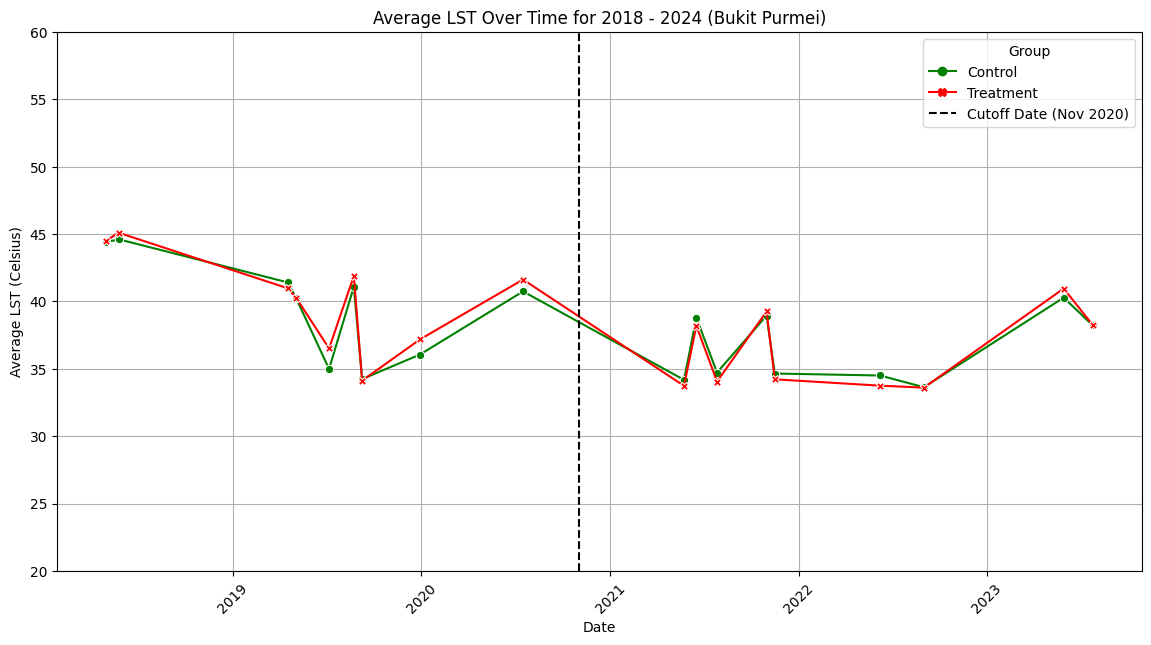

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def grouped_lst_bp(df):
    # Filter out unwanted QA_PIXEL and SR_QA_AEROSOL values
    qa_pixel_filter = [5504, 22280, 5896, 7440, 23826, 56854, 24082, 56598, 7698, 7442, 54596, 24144, 23888, 56916]
    sr_qa_aerosol_filter = [192, 194, 196, 224, 228]
    df = df[~df['QA_PIXEL'].isin(qa_pixel_filter)]
    df = df[~df['SR_QA_AEROSOL'].isin(sr_qa_aerosol_filter)]

    # Map blocks to groups
    block_group_map = {
        'polygon_112': 'Treatment',
        'polygon_114': 'Treatment',
        'polygon_113': 'Control',
        'polygon_115': 'Control'
    }
    df['group'] = df['block'].map(block_group_map)

    # Convert time to date and group by 'group' and 'date', then calculate the average LST
    df['date'] = df['time'].dt.date

    return df


def plot_grouped_lst_bp(df):
    # print(df[df['date'] == pd.Timestamp('2022-03-24')]) # This date has only 1 control observation, exclude this date

    df = df[df['date'] != pd.Timestamp('2022-03-24')]
    
    grouped_data = df.groupby(['group', 'date'])['LST_Celsius'].mean().reset_index()

    # Check which dates have data from both groups
    date_group_counts = grouped_data.groupby('date')['group'].nunique()
    valid_dates = date_group_counts[date_group_counts == 2].index  # Only dates where both groups are present
    grouped_data = grouped_data[grouped_data['date'].isin(valid_dates)]

    # Plotting using seaborn
    plt.figure(figsize=(14, 7))
    sns.lineplot(data=grouped_data, x='date', y='LST_Celsius', hue='group', palette={'Treatment': 'red', 'Control': 'green'}, markers=True, style='group', dashes=False)

    # Add vertical line for the cutoff date
    cutoff_date = pd.to_datetime('2020-11-01')
    plt.axvline(x=cutoff_date, color='black', linestyle='--', label='Cutoff Date (Nov 2020)')

    # Configure the plot aesthetics
    plt.title('Average LST Over Time for 2018 - 2024 (Bukit Purmei)')
    plt.xlabel('Date')
    plt.ylabel('Average LST (Celsius)')
    plt.ylim(20, 60)  # Set y-axis limits to better fit your data
    plt.grid(True)
    plt.legend(title='Group')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

    plt.show()

bukit_purmei_df_cc30 = grouped_lst_bp(bukit_purmei_df_cc30)

# Assuming you have a DataFrame loaded as bukit_purmei_df_cc30
plot_grouped_lst_bp(bukit_purmei_df_cc30)

### Differences-in-Differences Regression

##### Coefficient of `treatment:treatment_date` is -0.7489 and is statistically significant

##### Using PanelOLS (Clustered Standard Errors)

In [53]:
import pandas as pd
from linearmodels.panel import PanelOLS

bukit_purmei_df = bukit_purmei_df_cc30

# Convert 'time' column to datetime if it's not already
bukit_purmei_df['time'] = pd.to_datetime(bukit_purmei_df['time'])

# Create 'treatment' column where 'Treatment' group members receive 1, others 0
bukit_purmei_df['treatment'] = (bukit_purmei_df['group'] == 'Treatment').astype(int)

# Create 'time' column for post-treatment period (November 2020 onwards), assigning 1 for post-treatment and 0 otherwise
cutoff_date = pd.Timestamp('2020-11-01')
bukit_purmei_df['treatment_date'] = (bukit_purmei_df['time'].dt.date >= cutoff_date.date()).astype(int)

# Assuming 'block' is the identifier for different observational units
bukit_purmei_df = bukit_purmei_df.set_index(['block', 'time'], drop=False)

In [54]:
# Define the formula for the regression model
formula = 'LST_Celsius ~ 1 + EntityEffects + TimeEffects + treatment:treatment_date'

# Fit the DiD regression model using PanelOLS from linearmodels
model = PanelOLS.from_formula(formula, data=bukit_purmei_df)

# Print the results
results = model.fit(cov_type='clustered', cluster_entity=True)

print(results)

                          PanelOLS Estimation Summary                           
Dep. Variable:            LST_Celsius   R-squared:                        0.0327
Estimator:                   PanelOLS   R-squared (Between):             -1.4612
No. Observations:                 546   R-squared (Within):               0.0357
Date:                Thu, Jul 04 2024   R-squared (Overall):              0.0191
Time:                        15:50:21   Log-likelihood                   -714.02
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      17.250
Entities:                           4   P-value                           0.0000
Avg Obs:                       136.50   Distribution:                   F(1,511)
Min Obs:                       72.000                                           
Max Obs:                       184.00   F-statistic (robust):             58.040
                            

### Prior Trends Test

##### The coefficient of the interaction term `int_time_group` is 0.1365 and is not statistically significant.

In [56]:
import pandas as pd
from linearmodels.panel import PanelOLS

df = bukit_purmei_df

# Define the cutoff date
cutoff_date = pd.Timestamp('2020-11-01')

# Filter the dataset to include only data before the cutoff date
df_pre = df[df['time'] < cutoff_date].copy()

# Ensure 'block' is a column if not already
df_pre['block'] = df_pre['block'] if 'block' in df_pre.columns else range(len(df_pre))

# Convert 'time' to datetime format if not already
df_pre['time'] = pd.to_datetime(df_pre['time'])

# Set the index to 'block' and 'time' for Panel data format
df_pre = df_pre.set_index(['block', 'time'])

# Create the time variable as the number of periods from the start of the data
df_pre['time_periods'] = pd.factorize(df_pre.index.get_level_values('time').date)[0]

# Create interaction term for Time * Group
df_pre['group_binary'] = df_pre['group'].map({'Treatment': 1, 'Control': 0})
df_pre['int_time_group'] = df_pre['time_periods'] * df_pre['group_binary']

# Define the formula for PanelOLS
# As per Equation (18.3) in Chapter 18
formula = 'LST_Celsius ~ 1 + time_periods + group_binary + int_time_group'

# Fit the regression model using PanelOLS from linearmodels
model = PanelOLS.from_formula(formula, data=df_pre)
fitted_model = model.fit(cov_type='clustered', cluster_entity=True)

# Print the summary of the regression model
print(fitted_model)

                          PanelOLS Estimation Summary                           
Dep. Variable:            LST_Celsius   R-squared:                        0.5533
Estimator:                   PanelOLS   R-squared (Between):              0.6648
No. Observations:                 249   R-squared (Within):               0.5517
Date:                Thu, Jul 04 2024   R-squared (Overall):              0.5533
Time:                        15:52:04   Log-likelihood                   -583.33
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      101.17
Entities:                           4   P-value                           0.0000
Avg Obs:                       62.250   Distribution:                   F(3,245)
Min Obs:                       39.000                                           
Max Obs:                       75.000   F-statistic (robust):         -8.147e+15
                            

### Long-term Effects

In [57]:
# Creating 'time_periods' variable, factorising 'time' column
bukit_purmei_df['time_periods'] = pd.factorize(bukit_purmei_df.index.get_level_values('time').date)[0]

# Finding the first treatment_date == 1
filtered_df = bukit_purmei_df[bukit_purmei_df['treatment_date'] == 1]

# Find the earliest date in the 'time' column for these rows
earliest_date = filtered_df['time'].min()

# Get the corresponding value in 'time_periods' for the earliest date
corresponding_time_period = filtered_df[filtered_df['time'] == earliest_date]['time_periods'].iloc[0]

# Print the earliest date and the corresponding 'time_periods' value
print("The earliest date for 'treatment_date' == 1 is:", earliest_date)
print("The corresponding value in 'time_periods' is:", corresponding_time_period)

The earliest date for 'treatment_date' == 1 is: 2021-05-24 00:00:00
The corresponding value in 'time_periods' is: 18


In [58]:
# Scale time periods, drop period right before treatment period
bukit_purmei_df['time_periods_scaled'] = bukit_purmei_df.time_periods - 17

In [59]:
# Filtering valid time periods (where both control and treatment data exist)

# Subset to dates with both control and treated blocks
grouped = bukit_purmei_df.groupby(['group', pd.Grouper(freq='D', level='time')]).size().unstack(fill_value=0)
both_groups_present = (grouped.loc['Treatment'] > 0) & (grouped.loc['Control'] > 0)
valid_periods = both_groups_present[both_groups_present].index
#print(valid_periods)

#Subset the data to only include periods with control and treatment group, just in case error is due to this. but it is not, i.e., doing this step or not leads to the same error

bukit_purmei_df['date'] = bukit_purmei_df['time'].dt.date  # Extract date from datetime for comparison
valid_periods_set = set(valid_periods.date)  # Convert valid periods to a set of dates for efficient filtering

# Filter the DataFrame
bukit_purmei_subset_df = bukit_purmei_df[bukit_purmei_df['date'].isin(valid_periods_set)].copy()

#See the periods that we are left

# Get all values in 'time' column
unique_time_values = bukit_purmei_subset_df['time'].unique()
print(unique_time_values)

unique_period_values = bukit_purmei_subset_df['time_periods_scaled'].unique()
print(unique_period_values)

['2018-05-24T00:00:00.000000000' '2020-07-16T00:00:00.000000000'
 '2021-06-17T00:00:00.000000000' '2023-07-25T00:00:00.000000000'
 '2018-04-30T00:00:00.000000000' '2019-04-17T00:00:00.000000000'
 '2019-05-03T00:00:00.000000000' '2019-07-06T00:00:00.000000000'
 '2019-08-23T00:00:00.000000000' '2019-09-08T00:00:00.000000000'
 '2019-12-29T00:00:00.000000000' '2021-05-24T00:00:00.000000000'
 '2021-07-27T00:00:00.000000000' '2021-10-31T00:00:00.000000000'
 '2021-11-16T00:00:00.000000000' '2022-03-24T00:00:00.000000000'
 '2022-06-08T00:00:00.000000000' '2022-09-01T00:00:00.000000000'
 '2023-05-30T00:00:00.000000000']
[-16 -14 -13 -10  -7  -6  -5  -4  -3  -2   0   1   2   4   5   6   7   8
  11]


In [60]:
#Set index again to be sure
bukit_purmei_subset_df = bukit_purmei_subset_df.set_index(['block', 'time_periods_scaled'], drop=False)

In [61]:
# Ensure 'time_periods_scaled' is treated as a categorical variable
bukit_purmei_subset_df['time_periods'] = bukit_purmei_subset_df['time_periods'].astype('category')

# Create dummy variables for 'time_periods_scaled'
time_dummies = pd.get_dummies(bukit_purmei_subset_df['time_periods'], prefix='T')

time_dummies.head()

T_1  T_3  T_4  T_7  T_10  T_11  T_12  T_13  \
block       time_periods_scaled                                               
polygon_114 -16                    1    0    0    0     0     0     0     0   
            -16                    1    0    0    0     0     0     0     0   
polygon_115 -16                    1    0    0    0     0     0     0     0   
            -16                    1    0    0    0     0     0     0     0   
            -16                    1    0    0    0     0     0     0     0   

                                 T_14  T_15  T_17  T_18  T_19  T_21  T_22  \
block       time_periods_scaled                                             
polygon_114 -16                     0     0     0     0     0     0     0   
            -16                     0     0     0     0     0     0     0   
polygon_115 -16                     0     0     0     0     0     0     0   
            -16                     0     0     0     0     0     0     0   
            -16                     0     0     0     0     0     0     0   

                                 T_23  T_24  T_25  T_28  
block       time_periods_scaled                          
polygon_114 -16                     0     0     0     0  
            -16                     0     0     0     0  
polygon_115 -16                     0     0     0     0  
            -16                     0     0     0     0  
            -16                     0     0     0     0

In [62]:
# Drop one period before T_32
time_dummies.drop('T_17', axis=1, inplace=True)

In [63]:
# Add the dummy variables to the DataFrame
bukit_purmei_subset_df = pd.concat([bukit_purmei_subset_df, time_dummies], axis=1)

In [64]:
# Create a dictionary to hold the time values for each dummy variable
dummy_time_mapping = {}

# Iterate over each dummy variable
for dummy in time_dummies.columns:
    # Extract the 'time' values where the dummy variable is 1
    times = bukit_purmei_subset_df.loc[bukit_purmei_subset_df[dummy] == 1, 'time'].unique()
    dummy_time_mapping[dummy] = times

# Print the mapping
for dummy, times in dummy_time_mapping.items():
    print(f'{dummy}: {times}')

T_1: ['2018-05-24T00:00:00.000000000']
T_3: ['2020-07-16T00:00:00.000000000']
T_4: ['2021-06-17T00:00:00.000000000']
T_7: ['2023-07-25T00:00:00.000000000']
T_10: ['2018-04-30T00:00:00.000000000']
T_11: ['2019-04-17T00:00:00.000000000']
T_12: ['2019-05-03T00:00:00.000000000']
T_13: ['2019-07-06T00:00:00.000000000']
T_14: ['2019-08-23T00:00:00.000000000']
T_15: ['2019-09-08T00:00:00.000000000']
T_18: ['2021-05-24T00:00:00.000000000']
T_19: ['2021-07-27T00:00:00.000000000']
T_21: ['2021-10-31T00:00:00.000000000']
T_22: ['2021-11-16T00:00:00.000000000']
T_23: ['2022-03-24T00:00:00.000000000']
T_24: ['2022-06-08T00:00:00.000000000']
T_25: ['2022-09-01T00:00:00.000000000']
T_28: ['2023-05-30T00:00:00.000000000']


In [65]:
interaction_vars = []
for col in time_dummies.columns:
    interaction_col = f'{col}_treatment'
    bukit_purmei_subset_df[interaction_col] = bukit_purmei_subset_df[col] * bukit_purmei_subset_df['treatment']
    interaction_vars.append(interaction_col)

In [66]:
# Create the interaction terms string
interaction_terms = ' + '.join(interaction_vars)

# Display the interaction terms string
print(interaction_terms)

# Create the model formula, including the interaction terms and other covariates
formula = f'LST_Celsius ~ 1 + {interaction_terms} + EntityEffects + TimeEffects'

# Print the formula to verify
print(formula)

T_1_treatment + T_3_treatment + T_4_treatment + T_7_treatment + T_10_treatment + T_11_treatment + T_12_treatment + T_13_treatment + T_14_treatment + T_15_treatment + T_18_treatment + T_19_treatment + T_21_treatment + T_22_treatment + T_23_treatment + T_24_treatment + T_25_treatment + T_28_treatment
LST_Celsius ~ 1 + T_1_treatment + T_3_treatment + T_4_treatment + T_7_treatment + T_10_treatment + T_11_treatment + T_12_treatment + T_13_treatment + T_14_treatment + T_15_treatment + T_18_treatment + T_19_treatment + T_21_treatment + T_22_treatment + T_23_treatment + T_24_treatment + T_25_treatment + T_28_treatment + EntityEffects + TimeEffects


In [67]:
# Fit the DiD regression model using PanelOLS from linearmodels
model = PanelOLS.from_formula(formula, data=bukit_purmei_subset_df, drop_absorbed=True)

# Print the results
results = model.fit(cov_type='clustered', cluster_entity=True)
print(results)

                          PanelOLS Estimation Summary                           
Dep. Variable:            LST_Celsius   R-squared:                        0.1531
Estimator:                   PanelOLS   R-squared (Between):             -7.7332
No. Observations:                 478   R-squared (Within):              -0.0467
Date:                Thu, Jul 04 2024   R-squared (Overall):             -0.0582
Time:                        15:54:31   Log-likelihood                   -620.78
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      4.3975
Entities:                           4   P-value                           0.0000
Avg Obs:                       119.50   Distribution:                  F(18,438)
Min Obs:                       70.000                                           
Max Obs:                       150.00   F-statistic (robust):         -1.383e+17
                            

## Tampines 2020 - 2024

### Filtering Criteria for Clouds

In [ ]:
# # Assuming treatment_data and control_data are already loaded and contain the 'QA_PIXEL' column
# tampines_treatment_data['QA_PIXEL'] = tampines_treatment_data['QA_PIXEL'].fillna(-1).astype(int)
# tampines_control_data['QA_PIXEL'] = tampines_control_data['QA_PIXEL'].fillna(-1).astype(int)

# # Combine unique values from both datasets
# unique_values_treatment = set(tampines_treatment_data['QA_PIXEL'].unique())
# unique_values_control = set(tampines_control_data['QA_PIXEL'].unique())
# all_unique_values = unique_values_treatment.union(unique_values_control)  # Use set union to avoid duplicates

# def convert_to_binary_16(value):
#     # Convert value to binary, padded to 16 bits
#     if value == -1:
#         return 'NaN'  # Return a string 'NaN' for placeholder
#     binary_string = format(value, '016b')
#     # Split the binary string into 4 groups of 4 digits each
#     return ' '.join([binary_string[i:i+4] for i in range(0, 16, 4)])

# # Convert and print all unique values
# for value in all_unique_values:
#     binary_representation = convert_to_binary_16(value)
#     print(f'Original: {value}, Binary: {binary_representation}')

In [ ]:
# Filtering Criteria (1):
# qa_pixel_filter_1 = [5504, 5506, 54534, 54790, 22280, 5896, 55052, 7440, 7696, 23826, 56854, 24082, 56598, 7698, 7442, 54596, 54852, 24144, 23888, 56660, 56916]
# sr_qa_aerosol_filter_1 = [192, 194, 196, 224, 228]

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# File paths for Landsat 8 and 9 data
file_paths = {
    'Landsat8': {
        'treatment': r"C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\FilteredData\Tampines\Landsat8\Tampines_Treatment_Filtered_2020_to_2024.csv",
        'control': r"C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\FilteredData\Tampines\Landsat8\Tampines_Control_Filtered_2020_to_2024.csv"
    },
    'Landsat9': {
        'treatment': r"C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\FilteredData\Tampines\Landsat9\Tampines_Treatment_Filtered_2021_to_2024.csv",
        'control': r"C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\FilteredData\Tampines\Landsat9\Tampines_Control_Filtered_2021_to_2024.csv"
    },
    'Landsat7': {
        'treatment': r"C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\FilteredData\Tampines\Landsat7\Tampines_Treatment_Filtered_2020_to_2022.csv",
        'control': r"C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\FilteredData\Tampines\Landsat7\Tampines_Control_Filtered_2020_to_2022.csv"
    }
}

tampines_treatment_frames = []
tampines_control_frames = []

batch_1 = [
    'polygon_871A', 'polygon_871', 'polygon_872', 'polygon_873', 'polygon_874', 
    'polygon_874A', 'polygon_870', 'polygon_869', 'polygon_868', 'polygon_867', 
    'polygon_866', 'polygon_865', 'polygon_867A', 'polygon_863B', 'polygon_863', 
    'polygon_863A', 'polygon_864', 'polygon_864A', 'polygon_862A', 'polygon_862', 
    'polygon_857A', 'polygon_857', 'polygon_857B', 'polygon_827B', 'polygon_827A', 
    'polygon_825', 'polygon_824', 'polygon_823A', 'polygon_823', 'polygon_822', 
    'polygon_821', 'polygon_828', 'polygon_829', 'polygon_826', 'polygon_826A', 
    'polygon_828A', 'polygon_823A'
]

batch_4 = ['polygon_860B', 'polygon_860', 'polygon_860A', 'polygon_859A', 'polygon_859', 'polygon_859B', 'polygon_858B', 'polygon_858', 'polygon_858A', 'polygon_861A', 'polygon_861',
           'polygon_855', 'polygon_853', 'polygon_849', 'polygon_851', 'polygon_847', 'polygon_845', 'polygon_843',
           'polygon_841', 'polygon_840', 'polygon_839', 'polygon_838', 'polygon_835', 'polygon_837', 'polygon_836', 'polygon_832', 'polygon_830', 'polygon_831', 'polygon_833',
           'polygon_876', 'polygon_875', 'polygon_877', 'polygon_878', 'polygon_879', 'polygon_880', 'polygon_880A', 'Lighthouse Evangelism']

# Load data, add 'SATELLITE' and 'CTRL_TREATMENT' columns, and normalize the temperature column name
for satellite, paths in file_paths.items():
    for group, path in paths.items():
        temp_df = pd.read_csv(path)
        temp_df.rename(columns={'block_num': 'block'}, inplace=True)
        temp_df['SATELLITE'] = satellite
        temp_df['CTRL_TREATMENT'] = group
        # Check the satellite and rename the corresponding temperature column to 'LST_Celsius'
        if 'Landsat7' in satellite:
            temp_df.rename(columns={'ST_B6_Celsius': 'LST_Celsius'}, inplace=True)
        else:
            temp_df.rename(columns={'ST_B10_Celsius': 'LST_Celsius'}, inplace=True)
        if group == 'treatment':
            tampines_treatment_frames.append(temp_df)
        else:
            tampines_control_frames.append(temp_df)

# Concatenate all treatment and control data into single DataFrames
tampines_treatment_data = pd.concat(tampines_treatment_frames, ignore_index=True)
tampines_control_data = pd.concat(tampines_control_frames, ignore_index=True)

tampines_treatment_data = tampines_treatment_data[~tampines_treatment_data['block'].isin(batch_4)].copy()
tampines_control_data = tampines_control_data[~tampines_control_data['block'].isin(batch_4)].copy()

tampines_treatment_data = tampines_treatment_data[tampines_treatment_data['block'].isin(batch_1)].copy()

tampines_treatment_data = tampines_treatment_data[tampines_treatment_data['time'].isin(low_cloud_cover_dates)]
tampines_control_data = tampines_control_data[tampines_control_data['time'].isin(low_cloud_cover_dates)]

### Plot for Average LST against Time

#### Tampines Treatment & Control 2019 - 2024

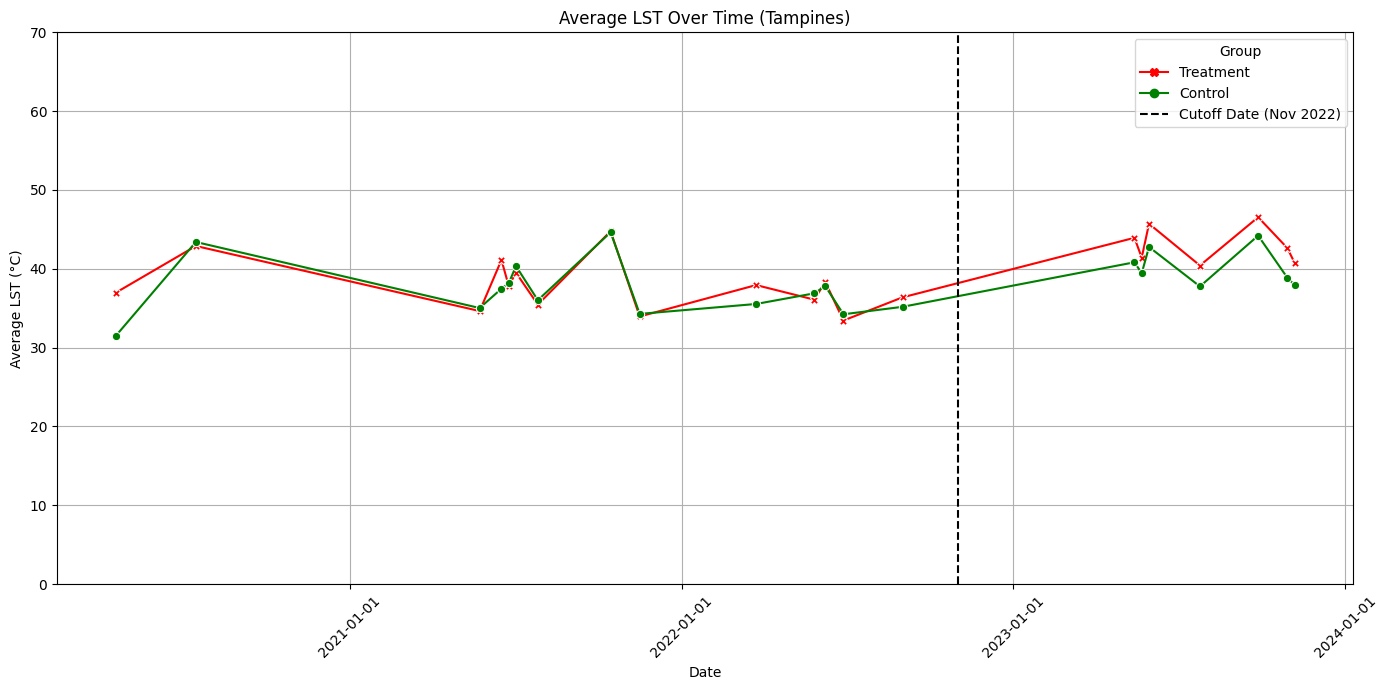

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Function to prepare and filter data
def prepare_data(data, qa_pixel_filter, sr_qa_aerosol_filter):
    data['time'] = pd.to_datetime(data['time'])
    data = data[~data['QA_PIXEL'].isin(qa_pixel_filter)]
    data = data[~data['SR_QA_AEROSOL'].isin(sr_qa_aerosol_filter)]
    return data.groupby(data['time'].dt.date)['LST_Celsius'].mean()

# Define filters
qa_pixel_filter = [5504, 5506, 54534, 54790, 22280, 5896, 55052, 7440, 7696, 23826, 56854, 24082, 56598, 7698, 7442, 54596, 54852, 24144, 23888, 56660, 56916]
sr_qa_aerosol_filter = [192, 194, 196, 224, 228]

# Prepare the data
tampines_treatment_lst = prepare_data(tampines_treatment_data, qa_pixel_filter, sr_qa_aerosol_filter)
tampines_control_lst = prepare_data(tampines_control_data, qa_pixel_filter, sr_qa_aerosol_filter)

# Combine into a single DataFrame and prepare for plotting
combined_dates = pd.concat([tampines_treatment_lst.rename('Treatment'), tampines_control_lst.rename('Control')], axis=1, join='inner').reset_index()
combined_dates.rename(columns={'index': 'date'}, inplace=True)

# Ensure 'date' is datetime for proper plotting
combined_dates['time'] = pd.to_datetime(combined_dates['time'])

# Plotting using seaborn with specified formatting
plt.figure(figsize=(14, 7))
sns.lineplot(data=combined_dates.melt(id_vars='time', var_name='Group', value_name='LST_Celsius'),
             x='time', y='LST_Celsius', hue='Group', style='Group', 
             markers={'Treatment': 'X', 'Control': 'o'}, 
             palette={'Treatment': 'red', 'Control': 'green'},
             dashes=False)

# Formatting Date Axis
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Mark the treatment cutoff date
treatment_date = pd.Timestamp('2022-11-01')
plt.axvline(x=treatment_date, color='black', linestyle='--', label='Cutoff Date (Nov 2022)')

# Set plot attributes
plt.title('Average LST Over Time (Tampines)')
plt.xlabel('Date')
plt.ylabel('Average LST (°C)')
plt.ylim(0, 70)  # Adjust y-axis limits as needed
plt.grid(True)
plt.legend(title='Group')
plt.xticks(rotation=45)  # Rotate date labels for clarity
plt.tight_layout()

plt.show()

### Differences-in-Differences Regression

##### Coefficient of `treatment:treatment_date` is 0.5554 and is not statistically significant

In [18]:
import pandas as pd
from linearmodels.panel import PanelOLS

# Add 'treatment' column: 1 for treatment data, 0 for control data
tampines_treatment_data['treatment'] = 1
tampines_control_data['treatment'] = 0

tampines_treatment_data['group'] = 'Treatment'
tampines_control_data['group'] = 'Control'

# Combine the treatment and control datasets
tampines_combined_data = pd.concat([tampines_treatment_data, tampines_control_data], ignore_index=True)

# Convert 'time' column to datetime if it's not already
tampines_combined_data['time'] = pd.to_datetime(tampines_combined_data['time'])

# Create 'time' column for post-treatment period, assigning 1 for post-treatment and 0 otherwise
cutoff_date = pd.Timestamp('2022-11-01')
tampines_combined_data['treatment_date'] = (tampines_combined_data['time'].dt.date >= cutoff_date.date()).astype(int)

# Ensure your DataFrame has an appropriate index for panel data analysis
tampines_combined_data = tampines_combined_data.set_index(['block', 'time'], drop=False)

In [19]:
# Define the formula for the regression model
formula = 'LST_Celsius ~ 1 + EntityEffects + TimeEffects + treatment:treatment_date'

# Fit the DiD regression model using PanelOLS from linearmodels
model = PanelOLS.from_formula(formula, data=tampines_combined_data)

# Print the results
results = model.fit(cov_type='clustered', cluster_entity=True)

print(results)

                          PanelOLS Estimation Summary                           
Dep. Variable:            LST_Celsius   R-squared:                        0.0345
Estimator:                   PanelOLS   R-squared (Between):              0.1519
No. Observations:               13462   R-squared (Within):              -0.0490
Date:                Thu, Jul 18 2024   R-squared (Overall):             -0.0433
Time:                        15:29:00   Log-likelihood                -3.416e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      476.66
Entities:                          63   P-value                           0.0000
Avg Obs:                       213.68   Distribution:                 F(1,13357)
Min Obs:                       78.000                                           
Max Obs:                       389.00   F-statistic (robust):             63.820
                            

### Prior Trends Test

##### The coefficient of `int_time_group` is 1.2475 and is not statistically significant

In [15]:
import pandas as pd
from linearmodels.panel import PanelOLS

df = tampines_combined_data

# Define the cutoff date
cutoff_date = pd.Timestamp('2020-11-01')

# Filter the dataset to include only data before the cutoff date
df_pre = df[df['time'] < cutoff_date].copy()

# Ensure 'block' is a column if not already
df_pre['block'] = df_pre['block'] if 'block' in df_pre.columns else range(len(df_pre))

# Convert 'time' to datetime format if not already
df_pre['time'] = pd.to_datetime(df_pre['time'])

# Set the index to 'block' and 'time' for Panel data format
df_pre = df_pre.set_index(['block', 'time'])

# Create the time variable as the number of periods from the start of the data
df_pre['time_periods'] = pd.factorize(df_pre.index.get_level_values('time').date)[0]

# Create interaction term for Time * Group
df_pre['int_time_group'] = df_pre['time_periods'] * df_pre['treatment']

# Define the formula for PanelOLS
formula = 'LST_Celsius ~ 1 + time_periods + treatment + int_time_group'

# Fit the regression model using PanelOLS from linearmodels
model = PanelOLS.from_formula(formula, data=df_pre, check_rank=False)
fitted_model = model.fit(cov_type='clustered', cluster_entity=True)

# Print the summary of the regression model
print(fitted_model)

                          PanelOLS Estimation Summary                           
Dep. Variable:            LST_Celsius   R-squared:                        0.1862
Estimator:                   PanelOLS   R-squared (Between):              0.1114
No. Observations:                2103   R-squared (Within):               0.1919
Date:                Thu, Jul 18 2024   R-squared (Overall):              0.1862
Time:                        15:27:33   Log-likelihood                   -6904.4
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      160.11
Entities:                          63   P-value                           0.0000
Avg Obs:                       33.381   Distribution:                  F(3,2099)
Min Obs:                       12.000                                           
Max Obs:                       63.000   F-statistic (robust):             195.94
                            

### Long-term Effects

In [78]:
# Sort the DataFrame by 'time' index level
tampines_combined_data.sort_index(level='time', inplace=True)

# Creating 'time_periods' variable, factorising 'time' column
tampines_combined_data['time_periods'] = pd.factorize(tampines_combined_data.index.get_level_values('time').date)[0]

# Finding the first treatment_date == 1
filtered_df = tampines_combined_data[tampines_combined_data['treatment_date'] == 1]

# Find the earliest date in the 'time' column for these rows
earliest_date = filtered_df['time'].min()

# Get the corresponding value in 'time_periods' for the earliest date
corresponding_time_period = filtered_df[filtered_df['time'] == earliest_date]['time_periods'].iloc[0]

# Print the earliest date and the corresponding 'time_periods' value
print("The earliest date for 'treatment_date' == 1 is:", earliest_date)
print("The corresponding value in 'time_periods' is:", corresponding_time_period)

The earliest date for 'treatment_date' == 1 is: 2023-05-14 00:00:00
The corresponding value in 'time_periods' is: 23


In [79]:
# Scale time periods, drop period right before treatment period
tampines_combined_data['time_periods_scaled'] = tampines_combined_data.time_periods - 22

In [80]:
# Filtering valid time periods (where both control and treatment data exist)

# Subset to dates with both control and treated blocks
grouped = tampines_combined_data.groupby(['group', pd.Grouper(freq='D', level='time')]).size().unstack(fill_value=0)
both_groups_present = (grouped.loc['Treatment'] > 0) & (grouped.loc['Control'] > 0)
valid_periods = both_groups_present[both_groups_present].index
#print(valid_periods)

#Subset the data to only include periods with control and treatment group, just in case error is due to this. but it is not, i.e., doing this step or not leads to the same error
tampines_combined_data['date'] = tampines_combined_data['time'].dt.date  # Extract date from datetime for comparison
valid_periods_set = set(valid_periods.date)  # Convert valid periods to a set of dates for efficient filtering

# Filter the DataFrame
tampines_subset_df = tampines_combined_data[tampines_combined_data['date'].isin(valid_periods_set)].copy()

#See the periods that we are left

# Get all values in 'time' column
unique_time_values = tampines_subset_df['time'].unique()
print(unique_time_values)

unique_period_values = tampines_subset_df['time_periods_scaled'].unique()
print(unique_period_values)

['2020-04-19T00:00:00.000000000' '2020-05-29T00:00:00.000000000'
 '2020-07-16T00:00:00.000000000' '2021-05-24T00:00:00.000000000'
 '2021-06-17T00:00:00.000000000' '2021-06-25T00:00:00.000000000'
 '2021-07-03T00:00:00.000000000' '2021-07-27T00:00:00.000000000'
 '2021-10-15T00:00:00.000000000' '2021-11-16T00:00:00.000000000'
 '2022-03-24T00:00:00.000000000' '2022-05-27T00:00:00.000000000'
 '2022-06-08T00:00:00.000000000' '2022-06-28T00:00:00.000000000'
 '2022-09-01T00:00:00.000000000' '2023-05-14T00:00:00.000000000'
 '2023-05-22T00:00:00.000000000' '2023-05-30T00:00:00.000000000'
 '2023-07-25T00:00:00.000000000' '2023-09-27T00:00:00.000000000'
 '2023-10-29T00:00:00.000000000' '2023-11-06T00:00:00.000000000']
[-21 -19 -18 -15 -14 -13 -12 -11  -9  -7  -6  -3  -2  -1   0   1   2   3
   5   6   8   9]


In [81]:
#Set index again to be sure
tampines_subset_df = tampines_subset_df.set_index(['block', 'time_periods_scaled'], drop=False)

In [82]:
# Ensure 'time_periods_scaled' is treated as a categorical variable
tampines_subset_df['time_periods'] = tampines_subset_df['time_periods'].astype('category')

# Create dummy variables for 'time_periods_scaled'
time_dummies = pd.get_dummies(tampines_subset_df['time_periods'], prefix='T')

time_dummies.head()

T_1  T_3  T_4  \
block                                   time_periods_scaled                  
Singapore Soka Association Headquarters -21                    1    0    0   
                                        -21                    1    0    0   
                                        -21                    1    0    0   
                                        -21                    1    0    0   
Tampines West Community Club            -21                    1    0    0   

                                                             T_7  T_8  T_9  \
block                                   time_periods_scaled                  
Singapore Soka Association Headquarters -21                    0    0    0   
                                        -21                    0    0    0   
                                        -21                    0    0    0   
                                        -21                    0    0    0   
Tampines West Community Club            -21                    0    0    0   

                                                             T_10  T_11  T_13  \
block                                   time_periods_scaled                     
Singapore Soka Association Headquarters -21                     0     0     0   
                                        -21                     0     0     0   
                                        -21                     0     0     0   
                                        -21                     0     0     0   
Tampines West Community Club            -21                     0     0     0   

                                                             T_15  ...  T_20  \
block                                   time_periods_scaled        ...         
Singapore Soka Association Headquarters -21                     0  ...     0   
                                        -21                     0  ...     0   
                                        -21                     0  ...     0   
                                        -21                     0  ...     0   
Tampines West Community Club            -21                     0  ...     0   

                                                             T_21  T_22  T_23  \
block                                   time_periods_scaled                     
Singapore Soka Association Headquarters -21                     0     0     0   
                                        -21                     0     0     0   
                                        -21                     0     0     0   
                                        -21                     0     0     0   
Tampines West Community Club            -21                     0     0     0   

                                                             T_24  T_25  T_27  \
block                                   time_periods_scaled                     
Singapore Soka Association Headquarters -21                     0     0     0   
                                        -21                     0     0     0   
                                        -21                     0     0     0   
                                        -21                     0     0     0   
Tampines West Community Club            -21                     0     0     0   

                                                             T_28  T_30  T_31  
block                                   time_periods_scaled                    
Singapore Soka Association Headquarters -21                     0     0     0  
                                        -21                     0     0     0  
                                        -21                     0     0     0  
                                        -21                     0     0     0  
Tampines West Community Club            -21                     0     0     0  

[5 rows x 22 columns]

In [83]:
# Drop one period before T_32
time_dummies.drop('T_22', axis=1, inplace=True)

In [84]:
# Add the dummy variables to the DataFrame
tampines_subset_df = pd.concat([tampines_subset_df, time_dummies], axis=1)

In [85]:
# Create a dictionary to hold the time values for each dummy variable
dummy_time_mapping = {}

# Iterate over each dummy variable
for dummy in time_dummies.columns:
    # Extract the 'time' values where the dummy variable is 1
    times = tampines_subset_df.loc[tampines_subset_df[dummy] == 1, 'time'].unique()
    dummy_time_mapping[dummy] = times

# Print the mapping
for dummy, times in dummy_time_mapping.items():
    print(f'{dummy}: {times}')

T_1: ['2020-04-19T00:00:00.000000000']
T_3: ['2020-05-29T00:00:00.000000000']
T_4: ['2020-07-16T00:00:00.000000000']
T_7: ['2021-05-24T00:00:00.000000000']
T_8: ['2021-06-17T00:00:00.000000000']
T_9: ['2021-06-25T00:00:00.000000000']
T_10: ['2021-07-03T00:00:00.000000000']
T_11: ['2021-07-27T00:00:00.000000000']
T_13: ['2021-10-15T00:00:00.000000000']
T_15: ['2021-11-16T00:00:00.000000000']
T_16: ['2022-03-24T00:00:00.000000000']
T_19: ['2022-05-27T00:00:00.000000000']
T_20: ['2022-06-08T00:00:00.000000000']
T_21: ['2022-06-28T00:00:00.000000000']
T_23: ['2023-05-14T00:00:00.000000000']
T_24: ['2023-05-22T00:00:00.000000000']
T_25: ['2023-05-30T00:00:00.000000000']
T_27: ['2023-07-25T00:00:00.000000000']
T_28: ['2023-09-27T00:00:00.000000000']
T_30: ['2023-10-29T00:00:00.000000000']
T_31: ['2023-11-06T00:00:00.000000000']


In [86]:
interaction_vars = []
for col in time_dummies.columns:
    interaction_col = f'{col}_treatment'
    tampines_subset_df[interaction_col] = tampines_subset_df[col] * tampines_subset_df['treatment']
    interaction_vars.append(interaction_col)

In [87]:
# Create the interaction terms string
interaction_terms = ' + '.join(interaction_vars)

# Display the interaction terms string
print(interaction_terms)

# Create the model formula, including the interaction terms and other covariates
formula = f'LST_Celsius ~ 1 + {interaction_terms} + EntityEffects + TimeEffects'

# Print the formula to verify
print(formula)

T_1_treatment + T_3_treatment + T_4_treatment + T_7_treatment + T_8_treatment + T_9_treatment + T_10_treatment + T_11_treatment + T_13_treatment + T_15_treatment + T_16_treatment + T_19_treatment + T_20_treatment + T_21_treatment + T_23_treatment + T_24_treatment + T_25_treatment + T_27_treatment + T_28_treatment + T_30_treatment + T_31_treatment
LST_Celsius ~ 1 + T_1_treatment + T_3_treatment + T_4_treatment + T_7_treatment + T_8_treatment + T_9_treatment + T_10_treatment + T_11_treatment + T_13_treatment + T_15_treatment + T_16_treatment + T_19_treatment + T_20_treatment + T_21_treatment + T_23_treatment + T_24_treatment + T_25_treatment + T_27_treatment + T_28_treatment + T_30_treatment + T_31_treatment + EntityEffects + TimeEffects


In [88]:
# Fit the DiD regression model using PanelOLS from linearmodels
model = PanelOLS.from_formula(formula, data=tampines_subset_df, drop_absorbed=True)

# Print the results
results = model.fit(cov_type='clustered', cluster_entity=True)
print(results)

                          PanelOLS Estimation Summary                           
Dep. Variable:            LST_Celsius   R-squared:                        0.1437
Estimator:                   PanelOLS   R-squared (Between):              0.0207
No. Observations:                4203   R-squared (Within):              -0.0309
Date:                Thu, Jul 04 2024   R-squared (Overall):             -0.0253
Time:                        16:35:07   Log-likelihood                   -6726.2
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      32.307
Entities:                         119   P-value                           0.0000
Avg Obs:                       35.319   Distribution:                 F(21,4042)
Min Obs:                       6.0000                                           
Max Obs:                       114.00   F-statistic (robust):             27.428
                            

## Hawker Centres

In [89]:
import pandas as pd
import matplotlib.pyplot as plt

# File paths for both Landsat 8 and Landsat 9 datasets
file_path_L8 = r"C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\FilteredData\HawkerCentres\Landsat8\Hawker_Centres_Filtered_2021_to_2024.csv"
file_path_L9 = r"C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\FilteredData\HawkerCentres\Landsat9\Hawker_Centres_Filtered_2021_to_2024.csv"
file_path_L7 = r"C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\FilteredData\HawkerCentres\Landsat7\Hawker_Centres_Filtered_2021_to_2022.csv"

# Load the datasets
data_L8 = pd.read_csv(file_path_L8)
data_L9 = pd.read_csv(file_path_L9)
data_L7 = pd.read_csv(file_path_L7)

# Rename temperature columns to a unified column name 'LST_Celsius'
data_L8.rename(columns={'ST_B10_Celsius': 'LST_Celsius'}, inplace=True)
data_L9.rename(columns={'ST_B10_Celsius': 'LST_Celsius'}, inplace=True)
data_L7.rename(columns={'ST_B6_Celsius': 'LST_Celsius'}, inplace=True)

# Convert 'time' column to datetime for both datasets
data_L8['time'] = pd.to_datetime(data_L8['time'])
data_L9['time'] = pd.to_datetime(data_L9['time'])
data_L7['time'] = pd.to_datetime(data_L7['time'])

# Concatenate both datasets
hawker_data = pd.concat([data_L8, data_L9, data_L7], ignore_index=True)

hawker_data = hawker_data[hawker_data['time'].isin(low_cloud_cover_dates)]

# # Combine unique values from QA_PIXEL across datasets
# hawker_data['QA_PIXEL'] = hawker_data['QA_PIXEL'].fillna(-1).astype(int)
# unique_values = pd.unique(hawker_data['QA_PIXEL'])

# # Print all unique QA_PIXEL values and their binary representations
# for value in unique_values:
#     binary_representation = convert_to_binary_16(value)
#     print(f'Original: {value}, Binary: {binary_representation}')

In [ ]:
# Filtering Criteria (1):
# qa_pixel_filter_1 = [5504, 5506, 54534, 54790, 22280, 5896, 55052, 7440, 7696, 23826, 56854, 24082, 56598, 7698, 7442, 54596, 54852, 24144, 23888, 56660, 56916]
# sr_qa_aerosol_filter_1 = [192, 194, 196, 224, 228]

# Filtering Criteria (2):
# qa_pixel_filter_2 = [5504, 5506, 22280, 5896, 55052, 7440, 7696, 23826, 56854, 24082, 56598, 7698, 7442, 54596, 24144, 23888, 56660, 56916]
# sr_qa_aerosol_filter_2 = [192, 194, 196]

### Holland Village Market & Food Centre

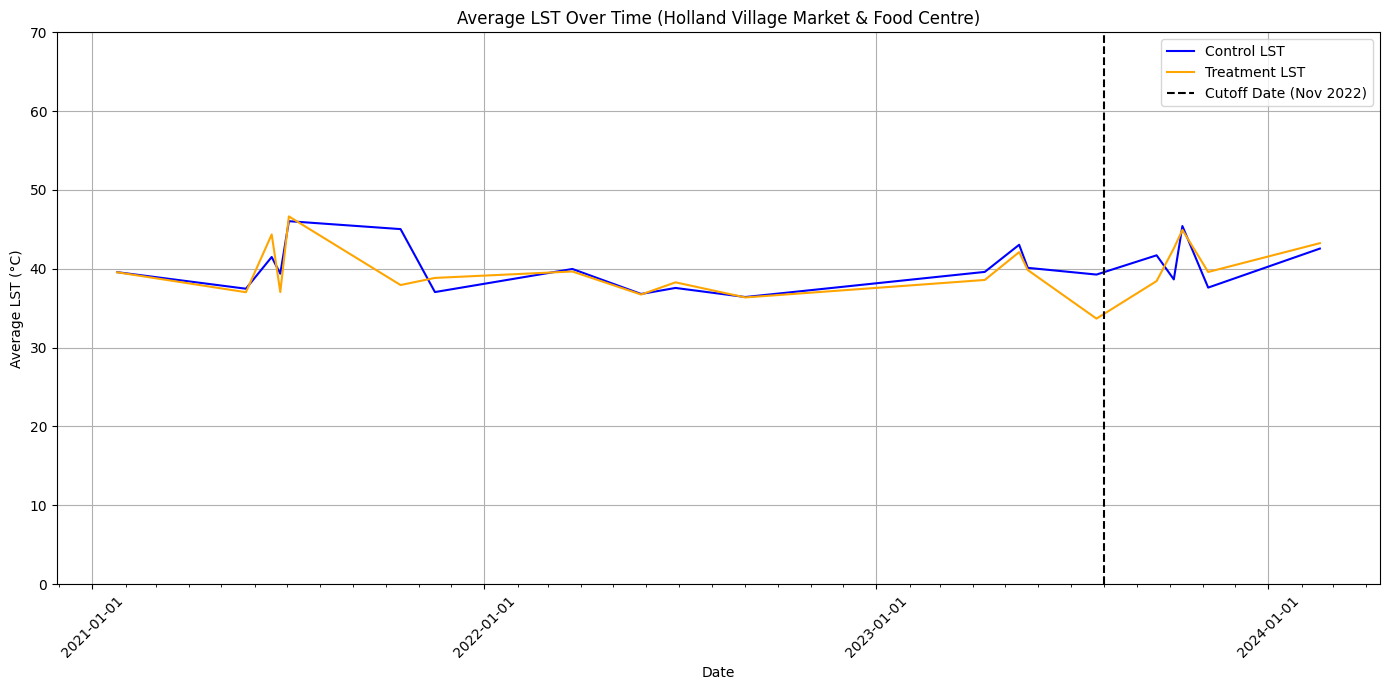

In [92]:
# List of hawker centres to be treated as "treatment"
main_treatment_centres = [
    # "North Bridge Road Market & Food Centre"
    "Holland Village Market & Food Centre"
    # "Commonwealth Crescent Market"
]

other_treatment_centres = [
    "North Bridge Road Market & Food Centre"
    # "Holland Village Market & Food Centre"
    "Commonwealth Crescent Market"
]

hv_hawker_data = hawker_data[~hawker_data['Hawker Centre'].isin(other_treatment_centres)]

# Label data as 'treatment' or 'control' based on hawker centre
hv_hawker_data['CTRL_TREATMENT'] = hv_hawker_data['Hawker Centre'].apply(lambda x: 'treatment' if x in main_treatment_centres else 'control')

# Filter out unwanted QA_PIXEL values
qa_pixel_filter_2 = [5504, 5506, 22280, 5896, 55052, 7440, 7696, 23826, 56854, 24082, 56598, 7698, 7442, 54596, 24144, 23888, 56660, 56916]
hv_hawker_data = hv_hawker_data[~hv_hawker_data['QA_PIXEL'].isin(qa_pixel_filter_2)]

# Additional filtering for 'SR_QA_AEROSOL'
sr_qa_aerosol_filter_2 = [192, 194, 196]
hv_hawker_data = hv_hawker_data[~hv_hawker_data['SR_QA_AEROSOL'].isin(sr_qa_aerosol_filter_2)]

# Split the data into treatment and control datasets
treatment_data = hv_hawker_data[hv_hawker_data['CTRL_TREATMENT'] == 'treatment']
control_data = hv_hawker_data[hv_hawker_data['CTRL_TREATMENT'] == 'control']

# Group by 'time' and calculate the average LST for treatment and control
average_treatment_lst = treatment_data.groupby('time')['LST_Celsius'].mean().reset_index()
average_control_lst = control_data.groupby('time')['LST_Celsius'].mean().reset_index()

# Group by 'time' and calculate the average LST for both 'treatment' and 'control'
grouped_data = hv_hawker_data.groupby(['CTRL_TREATMENT', hv_hawker_data['time'].dt.date])['LST_Celsius'].mean().unstack(0)

# Drop rows where any data is missing in either 'treatment' or 'control'
grouped_data.dropna(how='any', inplace=True)

# Plotting
fig, ax = plt.subplots(figsize=(14, 7))

# Colors for each group
colors = {'treatment': 'orange', 'control': 'blue'}

# Plot each column as a line in the plot
for column in grouped_data.columns:
    ax.plot(grouped_data.index, grouped_data[column], label=f'{column.capitalize()} LST', color=colors[column])

# Formatting Date Axis
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Mark the treatment date
# Treatment period was between 1 May 2023 - July 2023
treatment_date = pd.Timestamp('2023-08-01')
plt.axvline(x=treatment_date, color='black', linestyle='--', label='Cutoff Date (Nov 2022)')

# Set plot attributes
ax.set_title('Average LST Over Time (Holland Village Market & Food Centre)')
ax.set_xlabel('Date')
ax.set_ylabel('Average LST (°C)')
ax.set_ylim(bottom=0, top=70)
ax.grid(True)
ax.legend()

# Rotate date labels for clarity
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
plt.tight_layout()
plt.show()

In [106]:
hv_hawker_data[(hv_hawker_data['time'] == pd.Timestamp('2023-07-25')) & (hv_hawker_data['CTRL_TREATMENT'] == 'treatment')]['LST_Celsius'] # 4 observations

17287    32.778137
17288    33.718110
17289    33.236176
17290    35.006683
Name: LST_Celsius, dtype: float64

### Differences-in-Differences Regression

##### The coefficient of `treatment:treatment_date` is 0.9945 and is statistically significant

In [107]:
import pandas as pd
from linearmodels.panel import PanelOLS

hv_hawker_data['group'] = np.where(hv_hawker_data['CTRL_TREATMENT'] == 'treatment', 'Treatment', 'Control')
hv_hawker_data['treatment'] = np.where(hv_hawker_data['CTRL_TREATMENT'] == 'treatment', 1, 0)

# Convert 'time' column to datetime if it's not already
hv_hawker_data['time'] = pd.to_datetime(hv_hawker_data['time'])

# Create 'time' column for post-treatment period, assigning 1 for post-treatment and 0 otherwise
cutoff_date = pd.Timestamp('2023-08-01')
hv_hawker_data['treatment_date'] = (hv_hawker_data['time'].dt.date >= cutoff_date.date()).astype(int)

# Ensure your DataFrame has an appropriate index for panel data analysis
hv_hawker_data = hv_hawker_data.set_index(['Hawker Centre', 'time'], drop=False)

# Define the formula for the regression model
formula = 'LST_Celsius ~ 1 + EntityEffects + TimeEffects + treatment:treatment_date'

# Fit the DiD regression model using PanelOLS from linearmodels
model = PanelOLS.from_formula(formula, data=hv_hawker_data)

# Print the results
results = model.fit(cov_type='clustered', cluster_entity=True)

print(results)

                          PanelOLS Estimation Summary                           
Dep. Variable:            LST_Celsius   R-squared:                        0.0001
Estimator:                   PanelOLS   R-squared (Between):             -0.0106
No. Observations:               20930   R-squared (Within):               0.0002
Date:                Thu, Jul 04 2024   R-squared (Overall):           9.081e-05
Time:                        17:01:28   Log-likelihood                 -4.84e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      2.2740
Entities:                         113   P-value                           0.1316
Avg Obs:                       185.22   Distribution:                 F(1,20783)
Min Obs:                       1.0000                                           
Max Obs:                       1295.0   F-statistic (robust):             42.590
                            

#### Prior Trends Test (Parallel Trends Assumption)

##### Coefficient of `int_time_group` is -0.1312 and is statistically significant

In [108]:
import pandas as pd
from linearmodels.panel import PanelOLS

df = hv_hawker_data

# Define the cutoff date
cutoff_date = pd.Timestamp('2023-08-01')

# Filter the dataset to include only data before the cutoff date
df_pre = df[df['time'] < cutoff_date].copy()
df_pre['Hawker Centre'] = df_pre['Hawker Centre'] if 'block' in df_pre.columns else range(len(df_pre))

# Convert 'time' to datetime format if not already
df_pre['time'] = pd.to_datetime(df_pre['time'])

# Set the index to 'Hawker Centre' and 'time' for Panel data format
df_pre = df_pre.set_index(['Hawker Centre', 'time'])

# Create the time variable as the number of periods from the start of the data
df_pre['time_periods'] = pd.factorize(df_pre.index.get_level_values('time').date)[0]

# Create interaction term for Time * Group
df_pre['int_time_group'] = df_pre['time_periods'] * df_pre['treatment']

# Define the formula for PanelOLS
# As per Equation (18.3) in Chapter 18
formula = 'LST_Celsius ~ 1 + time_periods + treatment + int_time_group'

# Fit the regression model using PanelOLS from linearmodels
model = PanelOLS.from_formula(formula, data=df_pre, check_rank=False)
fitted_model = model.fit(cov_type='clustered', cluster_entity=True)

# Print the summary of the regression model
print(fitted_model)

                          PanelOLS Estimation Summary                           
Dep. Variable:            LST_Celsius   R-squared:                        0.0341
Estimator:                   PanelOLS   R-squared (Between):              0.0341
No. Observations:               15899   R-squared (Within):               0.0000
Date:                Thu, Jul 04 2024   R-squared (Overall):              0.0341
Time:                        17:01:46   Log-likelihood                 -4.54e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      186.85
Entities:                       15899   P-value                           0.0000
Avg Obs:                       1.0000   Distribution:                 F(3,15895)
Min Obs:                       1.0000                                           
Max Obs:                       1.0000   F-statistic (robust):             194.43
                            

### Long-term Effects

In [109]:
# Sort the DataFrame by 'time' index level
hv_hawker_data.sort_index(level='time', inplace=True)

# Creating 'time_periods' variable, factorising 'time' column
hv_hawker_data['time_periods'] = pd.factorize(hv_hawker_data.index.get_level_values('time').date)[0]

# Finding the first treatment_date == 1
filtered_df = hv_hawker_data[hv_hawker_data['treatment_date'] == 1]

# Find the earliest date in the 'time' column for these rows
earliest_date = filtered_df['time'].min()

# Get the corresponding value in 'time_periods' for the earliest date
corresponding_time_period = filtered_df[filtered_df['time'] == earliest_date]['time_periods'].iloc[0]

# Print the earliest date and the corresponding 'time_periods' value
print("The earliest date for 'treatment_date' == 1 is:", earliest_date)
print("The corresponding value in 'time_periods' is:", corresponding_time_period)

The earliest date for 'treatment_date' == 1 is: 2023-09-19 00:00:00
The corresponding value in 'time_periods' is: 26


In [110]:
# Scale time periods, drop period right before treatment period
hv_hawker_data['time_periods_scaled'] = hv_hawker_data.time_periods - 25

In [111]:
# Filtering valid time periods (where both control and treatment data exist)

# Subset to dates with both control and treated blocks
grouped = hv_hawker_data.groupby(['group', pd.Grouper(freq='D', level='time')]).size().unstack(fill_value=0)
both_groups_present = (grouped.loc['Treatment'] > 0) & (grouped.loc['Control'] > 0)
valid_periods = both_groups_present[both_groups_present].index
#print(valid_periods)

#Subset the data to only include periods with control and treatment group, just in case error is due to this. but it is not, i.e., doing this step or not leads to the same error

hv_hawker_data['date'] = hv_hawker_data['time'].dt.date  # Extract date from datetime for comparison
valid_periods_set = set(valid_periods.date)  # Convert valid periods to a set of dates for efficient filtering

# Filter the DataFrame
hv_subset_df = hv_hawker_data[hv_hawker_data['date'].isin(valid_periods_set)].copy()

#See the periods that we are left

# Get all values in 'time' column
unique_time_values = hv_subset_df['time'].unique()
print(unique_time_values)

unique_period_values = hv_subset_df['time_periods_scaled'].unique()
print(unique_period_values)

['2021-01-24T00:00:00.000000000' '2021-05-24T00:00:00.000000000'
 '2021-06-17T00:00:00.000000000' '2021-06-25T00:00:00.000000000'
 '2021-07-03T00:00:00.000000000' '2021-10-15T00:00:00.000000000'
 '2021-11-16T00:00:00.000000000' '2022-03-24T00:00:00.000000000'
 '2022-05-27T00:00:00.000000000' '2022-06-28T00:00:00.000000000'
 '2022-09-01T00:00:00.000000000' '2023-04-12T00:00:00.000000000'
 '2023-05-14T00:00:00.000000000' '2023-05-22T00:00:00.000000000'
 '2023-07-25T00:00:00.000000000' '2023-09-19T00:00:00.000000000'
 '2023-10-05T00:00:00.000000000' '2023-10-13T00:00:00.000000000'
 '2023-11-06T00:00:00.000000000' '2024-02-18T00:00:00.000000000']
[-25 -24 -23 -22 -21 -18 -16 -15 -11  -9  -7  -6  -5  -4   0   1   3   4
   6   8]


In [112]:
#Set index again to be sure
hv_subset_df = hv_subset_df.set_index(['Hawker Centre', 'time_periods_scaled'], drop=False)

In [113]:
# Ensure 'time_periods_scaled' is treated as a categorical variable
hv_subset_df['time_periods'] = hv_subset_df['time_periods'].astype('category')

# Create dummy variables for 'time_periods_scaled'
time_dummies = pd.get_dummies(hv_subset_df['time_periods'], prefix='T')

time_dummies.head()

T_0  T_1  T_2  T_3  \
Hawker Centre                       time_periods_scaled                       
ABC Brickworks Market & Food Centre -25                    1    0    0    0   
                                    -25                    1    0    0    0   
                                    -25                    1    0    0    0   
                                    -25                    1    0    0    0   
                                    -25                    1    0    0    0   

                                                         T_4  T_7  T_9  T_10  \
Hawker Centre                       time_periods_scaled                        
ABC Brickworks Market & Food Centre -25                    0    0    0     0   
                                    -25                    0    0    0     0   
                                    -25                    0    0    0     0   
                                    -25                    0    0    0     0   
                                    -25                    0    0    0     0   

                                                         T_14  T_16  T_18  \
Hawker Centre                       time_periods_scaled                     
ABC Brickworks Market & Food Centre -25                     0     0     0   
                                    -25                     0     0     0   
                                    -25                     0     0     0   
                                    -25                     0     0     0   
                                    -25                     0     0     0   

                                                         T_19  T_20  T_21  \
Hawker Centre                       time_periods_scaled                     
ABC Brickworks Market & Food Centre -25                     0     0     0   
                                    -25                     0     0     0   
                                    -25                     0     0     0   
                                    -25                     0     0     0   
                                    -25                     0     0     0   

                                                         T_25  T_26  T_28  \
Hawker Centre                       time_periods_scaled                     
ABC Brickworks Market & Food Centre -25                     0     0     0   
                                    -25                     0     0     0   
                                    -25                     0     0     0   
                                    -25                     0     0     0   
                                    -25                     0     0     0   

                                                         T_29  T_31  T_33  
Hawker Centre                       time_periods_scaled                    
ABC Brickworks Market & Food Centre -25                     0     0     0  
                                    -25                     0     0     0  
                                    -25                     0     0     0  
                                    -25                     0     0     0  
                                    -25                     0     0     0

In [114]:
# Drop one period before T_32
time_dummies.drop('T_25', axis=1, inplace=True)

In [115]:
# Add the dummy variables to the DataFrame
hv_subset_df = pd.concat([hv_subset_df, time_dummies], axis=1)

In [116]:
# Create a dictionary to hold the time values for each dummy variable
dummy_time_mapping = {}

# Iterate over each dummy variable
for dummy in time_dummies.columns:
    # Extract the 'time' values where the dummy variable is 1
    times = hv_subset_df.loc[hv_subset_df[dummy] == 1, 'time'].unique()
    dummy_time_mapping[dummy] = times

# Print the mapping
for dummy, times in dummy_time_mapping.items():
    print(f'{dummy}: {times}')

T_0: ['2021-01-24T00:00:00.000000000']
T_1: ['2021-05-24T00:00:00.000000000']
T_2: ['2021-06-17T00:00:00.000000000']
T_3: ['2021-06-25T00:00:00.000000000']
T_4: ['2021-07-03T00:00:00.000000000']
T_7: ['2021-10-15T00:00:00.000000000']
T_9: ['2021-11-16T00:00:00.000000000']
T_10: ['2022-03-24T00:00:00.000000000']
T_14: ['2022-05-27T00:00:00.000000000']
T_16: ['2022-06-28T00:00:00.000000000']
T_18: ['2022-09-01T00:00:00.000000000']
T_19: ['2023-04-12T00:00:00.000000000']
T_20: ['2023-05-14T00:00:00.000000000']
T_21: ['2023-05-22T00:00:00.000000000']
T_26: ['2023-09-19T00:00:00.000000000']
T_28: ['2023-10-05T00:00:00.000000000']
T_29: ['2023-10-13T00:00:00.000000000']
T_31: ['2023-11-06T00:00:00.000000000']
T_33: ['2024-02-18T00:00:00.000000000']


In [117]:
interaction_vars = []
for col in time_dummies.columns:
    interaction_col = f'{col}_treatment'
    hv_subset_df[interaction_col] = hv_subset_df[col] * hv_subset_df['treatment']
    interaction_vars.append(interaction_col)

In [118]:
# Create the interaction terms string
interaction_terms = ' + '.join(interaction_vars)

# Display the interaction terms string
print(interaction_terms)

# Create the model formula, including the interaction terms and other covariates
formula = f'LST_Celsius ~ 1 + {interaction_terms} + EntityEffects + TimeEffects'

# Print the formula to verify
print(formula)

T_0_treatment + T_1_treatment + T_2_treatment + T_3_treatment + T_4_treatment + T_7_treatment + T_9_treatment + T_10_treatment + T_14_treatment + T_16_treatment + T_18_treatment + T_19_treatment + T_20_treatment + T_21_treatment + T_26_treatment + T_28_treatment + T_29_treatment + T_31_treatment + T_33_treatment
LST_Celsius ~ 1 + T_0_treatment + T_1_treatment + T_2_treatment + T_3_treatment + T_4_treatment + T_7_treatment + T_9_treatment + T_10_treatment + T_14_treatment + T_16_treatment + T_18_treatment + T_19_treatment + T_20_treatment + T_21_treatment + T_26_treatment + T_28_treatment + T_29_treatment + T_31_treatment + T_33_treatment + EntityEffects + TimeEffects


In [119]:
# Fit the DiD regression model using PanelOLS from linearmodels
model = PanelOLS.from_formula(formula, data=hv_subset_df, drop_absorbed=True)

# Print the results
results = model.fit(cov_type='clustered', cluster_entity=True)
print(results)

                          PanelOLS Estimation Summary                           
Dep. Variable:            LST_Celsius   R-squared:                        0.0047
Estimator:                   PanelOLS   R-squared (Between):             -0.0845
No. Observations:               14511   R-squared (Within):               0.0010
Date:                Thu, Jul 04 2024   R-squared (Overall):             -0.0084
Time:                        17:02:35   Log-likelihood                -3.361e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      3.6061
Entities:                         113   P-value                           0.0000
Avg Obs:                       128.42   Distribution:                F(19,14360)
Min Obs:                       1.0000                                           
Max Obs:                       925.00   F-statistic (robust):             185.06
                            

### North Bridge Road Market & Food Centre

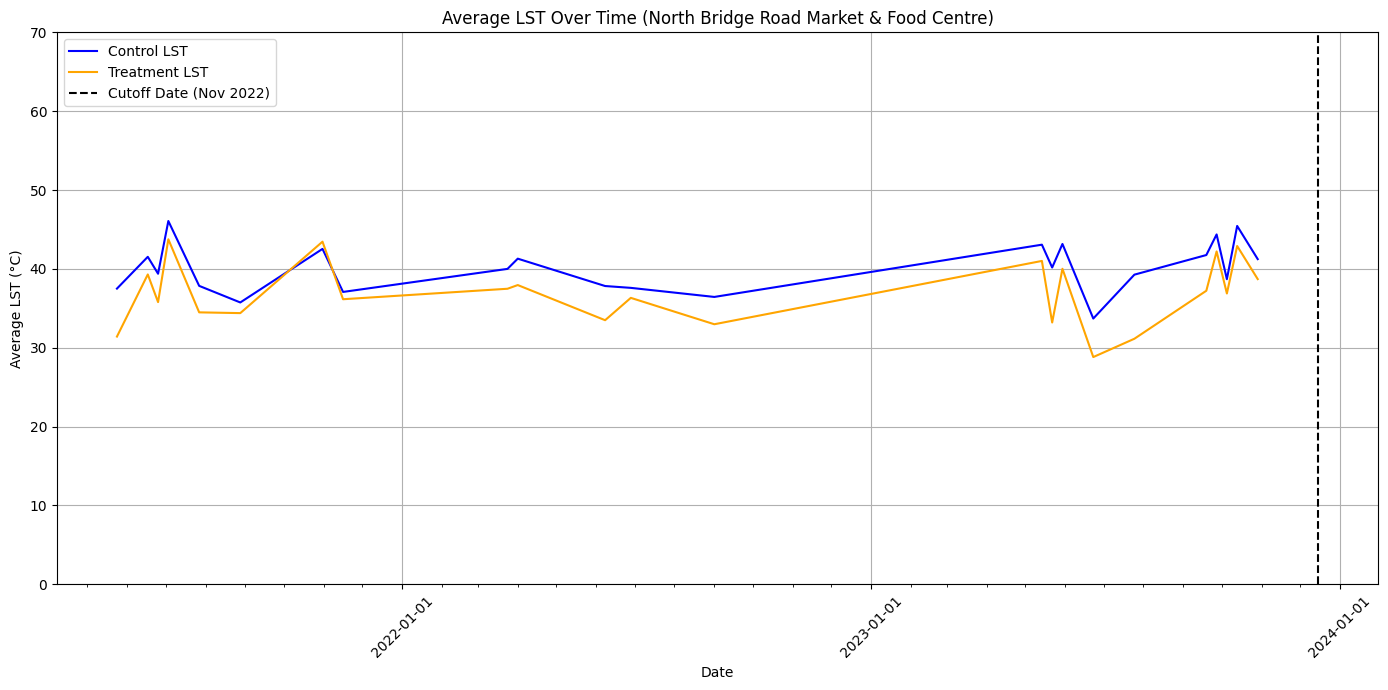

In [120]:
# List of hawker centres to be treated as "treatment"
main_treatment_centres = [
    "North Bridge Road Market & Food Centre"
    # "Holland Village Market & Food Centre"
    # "Commonwealth Crescent Market"
]

other_treatment_centres = [
    # "North Bridge Road Market & Food Centre"
    "Holland Village Market & Food Centre"
    "Commonwealth Crescent Market"
]

nbr_hawker_data = hawker_data[~hawker_data['Hawker Centre'].isin(other_treatment_centres)]

# Label data as 'treatment' or 'control' based on hawker centre
nbr_hawker_data['CTRL_TREATMENT'] = nbr_hawker_data['Hawker Centre'].apply(lambda x: 'treatment' if x in main_treatment_centres else 'control')

# Filter out unwanted QA_PIXEL values
qa_pixel_filter_2 = [5504, 5506, 22280, 5896, 55052, 7440, 7696, 23826, 56854, 24082, 56598, 7698, 7442, 54596, 24144, 23888, 56660, 56916]
nbr_hawker_data = nbr_hawker_data[~nbr_hawker_data['QA_PIXEL'].isin(qa_pixel_filter_2)]

# Additional filtering for 'SR_QA_AEROSOL'
sr_qa_aerosol_filter_2 = [192, 194, 196]
nbr_hawker_data = nbr_hawker_data[~nbr_hawker_data['SR_QA_AEROSOL'].isin(sr_qa_aerosol_filter_2)]

# Split the data into treatment and control datasets
treatment_data = nbr_hawker_data[nbr_hawker_data['CTRL_TREATMENT'] == 'treatment']
control_data = nbr_hawker_data[nbr_hawker_data['CTRL_TREATMENT'] == 'control']

# Group by 'time' and calculate the average LST for treatment and control
average_treatment_lst = treatment_data.groupby('time')['LST_Celsius'].mean().reset_index()
average_control_lst = control_data.groupby('time')['LST_Celsius'].mean().reset_index()

# Group by 'time' and calculate the average LST for both 'treatment' and 'control'
grouped_data = nbr_hawker_data.groupby(['CTRL_TREATMENT', nbr_hawker_data['time'].dt.date])['LST_Celsius'].mean().unstack(0)

# Drop rows where any data is missing in either 'treatment' or 'control'
grouped_data.dropna(how='any', inplace=True)

# Plotting
fig, ax = plt.subplots(figsize=(14, 7))

# Colors for each group
colors = {'treatment': 'orange', 'control': 'blue'}

# Plot each column as a line in the plot
for column in grouped_data.columns:
    ax.plot(grouped_data.index, grouped_data[column], label=f'{column.capitalize()} LST', color=colors[column])

# Formatting Date Axis
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Mark the treatment date
# Treatment was from 15 Sept 2023 - 14 Dec 2023
treatment_date = pd.Timestamp('2023-12-15')
plt.axvline(x=treatment_date, color='black', linestyle='--', label='Cutoff Date (Nov 2022)')

# Set plot attributes
ax.set_title('Average LST Over Time (North Bridge Road Market & Food Centre)')
ax.set_xlabel('Date')
ax.set_ylabel('Average LST (°C)')
ax.set_ylim(bottom=0, top=70)
ax.grid(True)
ax.legend()

# Rotate date labels for clarity
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
plt.tight_layout()
plt.show()

### Differences-in-Differences Regression

##### Coefficient of `treatment:treatment_date` is 0.9136 and is statistically significant

In [85]:
import pandas as pd
from linearmodels.panel import PanelOLS

nbr_hawker_data['group'] = np.where(nbr_hawker_data['CTRL_TREATMENT'] == 'treatment', 'Treatment', 'Control')
nbr_hawker_data['treatment'] = np.where(nbr_hawker_data['CTRL_TREATMENT'] == 'treatment', 1, 0)

# Convert 'time' column to datetime
nbr_hawker_data['time'] = pd.to_datetime(nbr_hawker_data['time'])

# Create 'time' column for post-treatment period, assigning 1 for post-treatment and 0 otherwise
cutoff_date = pd.Timestamp('2023-12-15')
nbr_hawker_data['treatment_date'] = (nbr_hawker_data['time'].dt.date >= cutoff_date.date()).astype(int)

# Ensure your DataFrame has an appropriate index for panel data analysis
nbr_hawker_data = nbr_hawker_data.set_index(['Hawker Centre', 'time'], drop=False)

# Define the formula for the regression model
formula = 'LST_Celsius ~ 1 + EntityEffects + TimeEffects + treatment:treatment_date'

# Fit the DiD regression model using PanelOLS from linearmodels
model = PanelOLS.from_formula(formula, data=nbr_hawker_data)

# Print the results
results = model.fit(cov_type='clustered', cluster_entity=True)

print(results)

                          PanelOLS Estimation Summary                           
Dep. Variable:            LST_Celsius   R-squared:                     7.254e-05
Estimator:                   PanelOLS   R-squared (Between):             -0.0135
No. Observations:               26959   R-squared (Within):            9.622e-05
Date:                Sun, Jun 23 2024   R-squared (Overall):          -2.775e-05
Time:                        20:38:12   Log-likelihood                -6.591e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      1.9423
Entities:                         112   P-value                           0.1634
Avg Obs:                       240.71   Distribution:                 F(1,26775)
Min Obs:                       71.000                                           
Max Obs:                       2174.0   F-statistic (robust):             38.422
                            

#### Prior Trends Test

##### The coefficient of `int_time_group` is 0.0715 and is statistically significant

In [86]:
import pandas as pd
from linearmodels.panel import PanelOLS

df = nbr_hawker_data

# Define the cutoff date
cutoff_date = pd.Timestamp('2023-12-15')

# Filter the dataset to include only data before the cutoff date
df_pre = df[df['time'] < cutoff_date].copy()
df_pre['Hawker Centre'] = df_pre['Hawker Centre'] if 'block' in df_pre.columns else range(len(df_pre))

# Convert 'time' to datetime format if not already
df_pre['time'] = pd.to_datetime(df_pre['time'])

# Set the index to 'Hawker Centre' and 'time' for Panel data format
df_pre = df_pre.set_index(['Hawker Centre', 'time'])

# Create the time variable as the number of periods from the start of the data
df_pre['time_periods'] = pd.factorize(df_pre.index.get_level_values('time').date)[0]

# Create interaction term for Time * Group
df_pre['int_time_group'] = df_pre['time_periods'] * df_pre['treatment']

# Define the formula for PanelOLS
# As per Equation (18.3) in Chapter 18
formula = 'LST_Celsius ~ 1 + time_periods + treatment + int_time_group'

# Fit the regression model using PanelOLS from linearmodels
model = PanelOLS.from_formula(formula, data=df_pre, check_rank=False)
fitted_model = model.fit(cov_type='clustered', cluster_entity=True)

# Print the summary of the regression model
print(fitted_model)

                          PanelOLS Estimation Summary                           
Dep. Variable:            LST_Celsius   R-squared:                        0.0038
Estimator:                   PanelOLS   R-squared (Between):              0.0038
No. Observations:               22497   R-squared (Within):               0.0000
Date:                Sun, Jun 23 2024   R-squared (Overall):              0.0038
Time:                        20:38:15   Log-likelihood                -7.189e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      28.308
Entities:                       22497   P-value                           0.0000
Avg Obs:                       1.0000   Distribution:                 F(3,22493)
Min Obs:                       1.0000                                           
Max Obs:                       1.0000   F-statistic (robust):             31.443
                            

### Long-term Effects

In [88]:
# Sort the DataFrame by 'time' index level
nbr_hawker_data.sort_index(level='time', inplace=True)

# Creating 'time_periods' variable, factorising 'time' column
nbr_hawker_data['time_periods'] = pd.factorize(nbr_hawker_data.index.get_level_values('time').date)[0]

# Finding the first treatment_date == 1
filtered_df = nbr_hawker_data[nbr_hawker_data['treatment_date'] == 1]

# Find the earliest date in the 'time' column for these rows
earliest_date = filtered_df['time'].min()

# Get the corresponding value in 'time_periods' for the earliest date
corresponding_time_period = filtered_df[filtered_df['time'] == earliest_date]['time_periods'].iloc[0]

# Print the earliest date and the corresponding 'time_periods' value
print("The earliest date for 'treatment_date' == 1 is:", earliest_date)
print("The corresponding value in 'time_periods' is:", corresponding_time_period)

The earliest date for 'treatment_date' == 1 is: 2023-12-16 00:00:00
The corresponding value in 'time_periods' is: 60


In [89]:
# Scale time periods, drop period right before treatment period
nbr_hawker_data['time_periods_scaled'] = nbr_hawker_data.time_periods - 59

In [91]:
# Filtering valid time periods (where both control and treatment data exist)
#Make subset dataset. Won't be able to run with the full dataset, because in every period, the regression makes a comparison between the treatment and control, and between the indicated period and the base (omitted period).

#subset to dates with both control and treated blocks

grouped = nbr_hawker_data.groupby(['group', pd.Grouper(freq='D', level='time')]).size().unstack(fill_value=0)
both_groups_present = (grouped.loc['Treatment'] > 0) & (grouped.loc['Control'] > 0)
valid_periods = both_groups_present[both_groups_present].index
#print(valid_periods)

#Subset the data to only include periods with control and treatment group, just in case error is due to this. but it is not, i.e., doing this step or not leads to the same error

nbr_hawker_data['date'] = nbr_hawker_data['time'].dt.date  # Extract date from datetime for comparison
valid_periods_set = set(valid_periods.date)  # Convert valid periods to a set of dates for efficient filtering

# Filter the DataFrame
nbr_subset_df = nbr_hawker_data[nbr_hawker_data['date'].isin(valid_periods_set)].copy()

#See the periods that we are left

# Get all values in 'time' column
unique_time_values = nbr_subset_df['time'].unique()
print(unique_time_values)

unique_period_values = nbr_subset_df['time_periods_scaled'].unique()
print(unique_period_values)

['2022-01-19T00:00:00.000000000' '2022-02-04T00:00:00.000000000'
 '2022-02-12T00:00:00.000000000' '2022-03-24T00:00:00.000000000'
 '2022-04-01T00:00:00.000000000' '2022-04-25T00:00:00.000000000'
 '2022-06-08T00:00:00.000000000' '2022-06-28T00:00:00.000000000'
 '2022-07-30T00:00:00.000000000' '2022-09-01T00:00:00.000000000'
 '2022-10-22T00:00:00.000000000' '2023-05-14T00:00:00.000000000'
 '2023-05-22T00:00:00.000000000' '2023-05-30T00:00:00.000000000'
 '2023-06-07T00:00:00.000000000' '2023-06-23T00:00:00.000000000'
 '2023-07-25T00:00:00.000000000' '2023-08-10T00:00:00.000000000'
 '2023-09-19T00:00:00.000000000' '2023-09-27T00:00:00.000000000'
 '2023-10-05T00:00:00.000000000' '2023-10-13T00:00:00.000000000'
 '2023-10-29T00:00:00.000000000' '2024-03-13T00:00:00.000000000'
 '2024-03-29T00:00:00.000000000' '2024-04-06T00:00:00.000000000']
[-58 -56 -55 -50 -49 -47 -42 -41 -35 -31 -29 -19 -18 -17 -16 -14 -11  -9
  -7  -6  -5  -4  -3   7   9  10]


In [93]:
#Set index again to be sure
nbr_subset_df = nbr_subset_df.set_index(['Hawker Centre', 'time_periods_scaled'], drop=False)

In [94]:
# Ensure 'time_periods_scaled' is treated as a categorical variable
nbr_subset_df['time_periods'] = nbr_subset_df['time_periods'].astype('category')

# Create dummy variables for 'time_periods_scaled'
time_dummies = pd.get_dummies(nbr_subset_df['time_periods'], prefix='T')

time_dummies.head()

T_1  T_3  T_4  T_9  \
Hawker Centre                       time_periods_scaled                       
ABC Brickworks Market & Food Centre -58                    1    0    0    0   
                                    -58                    1    0    0    0   
                                    -58                    1    0    0    0   
                                    -58                    1    0    0    0   
                                    -58                    1    0    0    0   

                                                         T_10  T_12  T_17  \
Hawker Centre                       time_periods_scaled                     
ABC Brickworks Market & Food Centre -58                     0     0     0   
                                    -58                     0     0     0   
                                    -58                     0     0     0   
                                    -58                     0     0     0   
                                    -58                     0     0     0   

                                                         T_18  T_24  T_28  \
Hawker Centre                       time_periods_scaled                     
ABC Brickworks Market & Food Centre -58                     0     0     0   
                                    -58                     0     0     0   
                                    -58                     0     0     0   
                                    -58                     0     0     0   
                                    -58                     0     0     0   

                                                         ...  T_48  T_50  \
Hawker Centre                       time_periods_scaled  ...               
ABC Brickworks Market & Food Centre -58                  ...     0     0   
                                    -58                  ...     0     0   
                                    -58                  ...     0     0   
                                    -58                  ...     0     0   
                                    -58                  ...     0     0   

                                                         T_52  T_53  T_54  \
Hawker Centre                       time_periods_scaled                     
ABC Brickworks Market & Food Centre -58                     0     0     0   
                                    -58                     0     0     0   
                                    -58                     0     0     0   
                                    -58                     0     0     0   
                                    -58                     0     0     0   

                                                         T_55  T_56  T_66  \
Hawker Centre                       time_periods_scaled                     
ABC Brickworks Market & Food Centre -58                     0     0     0   
                                    -58                     0     0     0   
                                    -58                     0     0     0   
                                    -58                     0     0     0   
                                    -58                     0     0     0   

                                                         T_68  T_69  
Hawker Centre                       time_periods_scaled              
ABC Brickworks Market & Food Centre -58                     0     0  
                                    -58                     0     0  
                                    -58                     0     0  
                                    -58                     0     0  
                                    -58                     0     0  

[5 rows x 26 columns]

In [97]:
# Drop one period before T_32
time_dummies.drop('T_56', axis=1, inplace=True)

# T_59 is not present in the dataframe for both control and treatment, dropped T_56 instead (latest period before treatment)
# T_56 is the baseline

In [98]:
# Add the dummy variables to the DataFrame
nbr_subset_df = pd.concat([nbr_subset_df, time_dummies], axis=1)

In [99]:
# Create a dictionary to hold the time values for each dummy variable
dummy_time_mapping = {}

# Iterate over each dummy variable
for dummy in time_dummies.columns:
    # Extract the 'time' values where the dummy variable is 1
    times = nbr_subset_df.loc[nbr_subset_df[dummy] == 1, 'time'].unique()
    dummy_time_mapping[dummy] = times

# Print the mapping
for dummy, times in dummy_time_mapping.items():
    print(f'{dummy}: {times}')

T_1: ['2022-01-19T00:00:00.000000000']
T_3: ['2022-02-04T00:00:00.000000000']
T_4: ['2022-02-12T00:00:00.000000000']
T_9: ['2022-03-24T00:00:00.000000000']
T_10: ['2022-04-01T00:00:00.000000000']
T_12: ['2022-04-25T00:00:00.000000000']
T_17: ['2022-06-08T00:00:00.000000000']
T_18: ['2022-06-28T00:00:00.000000000']
T_24: ['2022-07-30T00:00:00.000000000']
T_28: ['2022-09-01T00:00:00.000000000']
T_30: ['2022-10-22T00:00:00.000000000']
T_40: ['2023-05-14T00:00:00.000000000']
T_41: ['2023-05-22T00:00:00.000000000']
T_42: ['2023-05-30T00:00:00.000000000']
T_43: ['2023-06-07T00:00:00.000000000']
T_45: ['2023-06-23T00:00:00.000000000']
T_48: ['2023-07-25T00:00:00.000000000']
T_50: ['2023-08-10T00:00:00.000000000']
T_52: ['2023-09-19T00:00:00.000000000']
T_53: ['2023-09-27T00:00:00.000000000']
T_54: ['2023-10-05T00:00:00.000000000']
T_55: ['2023-10-13T00:00:00.000000000']
T_66: ['2024-03-13T00:00:00.000000000']
T_68: ['2024-03-29T00:00:00.000000000']
T_69: ['2024-04-06T00:00:00.000000000']


In [100]:
interaction_vars = []
for col in time_dummies.columns:
    interaction_col = f'{col}_treatment'
    nbr_subset_df[interaction_col] = nbr_subset_df[col] * nbr_subset_df['treatment']
    interaction_vars.append(interaction_col)

In [101]:
# Create the interaction terms string
interaction_terms = ' + '.join(interaction_vars)

# Display the interaction terms string
print(interaction_terms)

# Create the model formula, including the interaction terms and other covariates
formula = f'LST_Celsius ~ 1 + {interaction_terms} + EntityEffects + TimeEffects'

# Print the formula to verify
print(formula)

T_1_treatment + T_3_treatment + T_4_treatment + T_9_treatment + T_10_treatment + T_12_treatment + T_17_treatment + T_18_treatment + T_24_treatment + T_28_treatment + T_30_treatment + T_40_treatment + T_41_treatment + T_42_treatment + T_43_treatment + T_45_treatment + T_48_treatment + T_50_treatment + T_52_treatment + T_53_treatment + T_54_treatment + T_55_treatment + T_66_treatment + T_68_treatment + T_69_treatment
LST_Celsius ~ 1 + T_1_treatment + T_3_treatment + T_4_treatment + T_9_treatment + T_10_treatment + T_12_treatment + T_17_treatment + T_18_treatment + T_24_treatment + T_28_treatment + T_30_treatment + T_40_treatment + T_41_treatment + T_42_treatment + T_43_treatment + T_45_treatment + T_48_treatment + T_50_treatment + T_52_treatment + T_53_treatment + T_54_treatment + T_55_treatment + T_66_treatment + T_68_treatment + T_69_treatment + EntityEffects + TimeEffects


In [102]:
# Fit the DiD regression model using PanelOLS from linearmodels
model = PanelOLS.from_formula(formula, data=nbr_subset_df, drop_absorbed=True)

# Print the results
results = model.fit(cov_type='clustered', cluster_entity=True)
print(results)

                          PanelOLS Estimation Summary                           
Dep. Variable:            LST_Celsius   R-squared:                        0.0055
Estimator:                   PanelOLS   R-squared (Between):             -0.0039
No. Observations:               17504   R-squared (Within):              -0.0003
Date:                Sun, Jun 23 2024   R-squared (Overall):          -4.781e-06
Time:                        20:48:34   Log-likelihood                -4.029e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      3.8516
Entities:                         112   P-value                           0.0000
Avg Obs:                       156.29   Distribution:                F(25,17342)
Min Obs:                       44.000                                           
Max Obs:                       1007.0   F-statistic (robust):             249.64
                            

## Tuas South Street 5

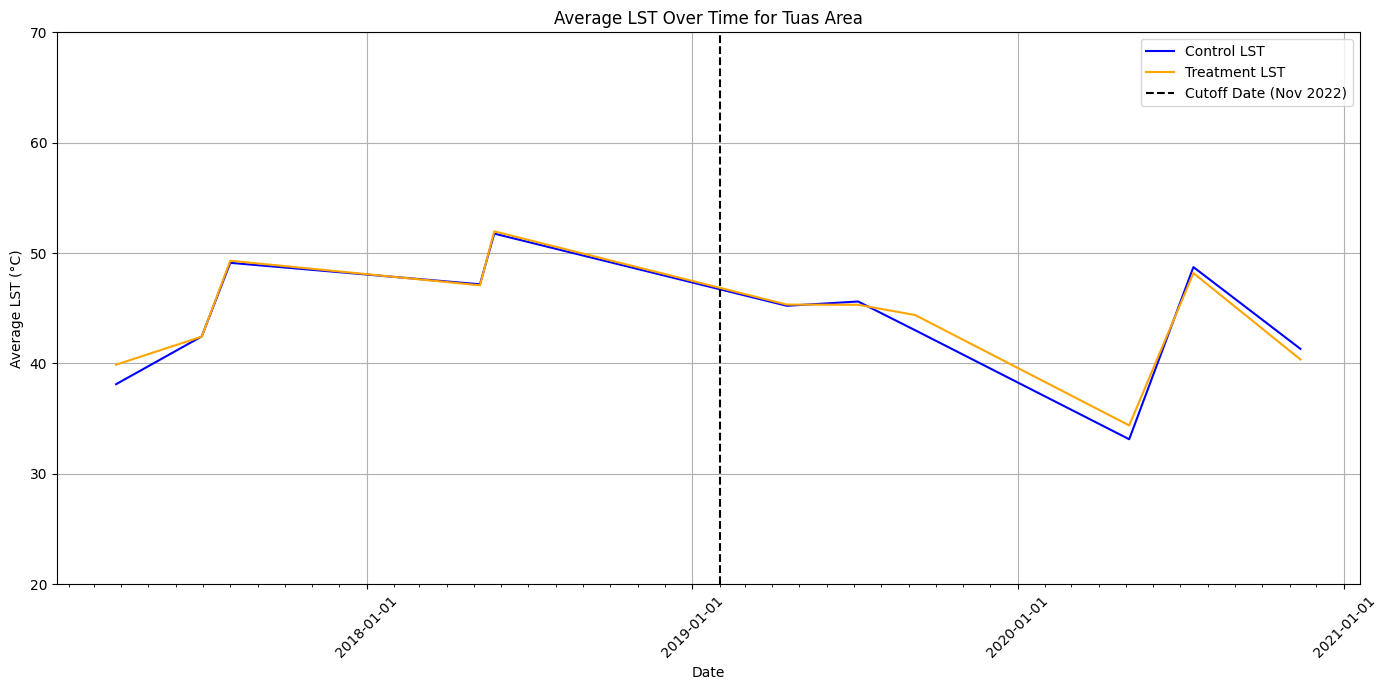

In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Paths to the CSV files
file_path1 = r"C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\FilteredData\Tuas\Landsat8\Tuas_Filtered_2017_to_2020.csv"
file_path2 = r"C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\FilteredData\Tuas\Landsat7\Tuas_Filtered_2017_to_2020.csv"

# Read the CSV files
df1 = pd.read_csv(file_path1)
df2 = pd.read_csv(file_path2)

# Rename temperature columns to a unified column name
df1.rename(columns={'ST_B10_Celsius': 'LST_Celsius'}, inplace=True)
df2.rename(columns={'ST_B6_Celsius': 'LST_Celsius'}, inplace=True)

# Concatenate the three dataframes
tuas_df = pd.concat([df1, df2], ignore_index=True)

tuas_df = tuas_df[tuas_df['time'].isin(low_cloud_cover_dates)]

# Convert 'time' to datetime
tuas_df['time'] = pd.to_datetime(tuas_df['time'])

# Filter out unwanted QA_PIXEL values
qa_pixel_filter_1 = [5504, 5506, 54534, 54790, 22280, 5896, 55052, 7440, 7696, 23826, 56854, 24082, 56598, 7698, 7442, 54596, 54852, 24144, 23888, 56660, 56916]
tuas_df = tuas_df[~tuas_df['QA_PIXEL'].isin(qa_pixel_filter_1)]

# Additional filtering for 'SR_QA_AEROSOL'
sr_qa_aerosol_filter_1 = [192, 194, 196, 224, 228]
tuas_df = tuas_df[~tuas_df['SR_QA_AEROSOL'].isin(sr_qa_aerosol_filter_1)]

# Map blocks to grouped blocks based on provided polygon numbers
treatment_polygons = ['8', '10', '12', '14']
control_polygons = ['6', '16', '18', '58', '60', '62', '64', '66', '68', '70', '72', '74', '18']

# Create a mapping function based on polygon suffix
def map_group(polygon):
    suffix = polygon.split('_')[-1]
    return 'treatment' if suffix in treatment_polygons else 'control'

tuas_df['group'] = tuas_df['BLOCK_NO'].map(map_group)

# Group by 'group' and 'time', and calculate the average LST_Celsius
grouped_data = tuas_df.groupby(['group', tuas_df['time'].dt.date])['LST_Celsius'].mean().unstack(0)
grouped_data = grouped_data.dropna(how='any', axis=0)

# Plotting
fig, ax = plt.subplots(figsize=(14, 7))

colors = {'treatment': 'orange', 'control': 'blue'}

for column in grouped_data.columns:
    ax.plot(grouped_data.index, grouped_data[column], label=f'{column.capitalize()} LST', color=colors.get(column, 'grey'))

# Formatting Date Axis
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Mark the treatment date
# Treatment was during the period Dec 2018 - Jan 2019 (according to NTU Study)
treatment_date = pd.Timestamp('2019-02-01')
plt.axvline(x=treatment_date, color='black', linestyle='--', label='Cutoff Date (Nov 2022)')

ax.set_title('Average LST Over Time for Tuas Area')
ax.set_xlabel('Date')
ax.set_ylabel('Average LST (°C)')
ax.set_ylim(bottom=20, top=70)
ax.grid(True)
ax.legend()

# Rotate date labels for clarity
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
plt.tight_layout()
plt.show()

### Differences-in-Differences Regression

##### The coefficient of `treatment:treatment_date` is -0.3398 and is not statistically significant

In [123]:
import pandas as pd
from linearmodels.panel import PanelOLS

tuas_df['treatment'] = np.where(tuas_df['group'] == 'treatment', 1, 0)

# Convert 'time' column to datetime if it's not already
tuas_df['time'] = pd.to_datetime(tuas_df['time'])

# Create 'time' column for post-treatment period, assigning 1 for post-treatment and 0 otherwise
cutoff_date = pd.Timestamp('2019-02-01')
tuas_df['treatment_date'] = (tuas_df['time'].dt.date >= cutoff_date.date()).astype(int)

# Ensure your DataFrame has an appropriate index for panel data analysis
tuas_df = tuas_df.set_index(['BLOCK_NO', 'time'], drop=False)

In [124]:

# Define the formula for the regression model
formula = 'LST_Celsius ~ 1 + EntityEffects + TimeEffects + treatment:treatment_date'

# Fit the DiD regression model using PanelOLS from linearmodels
model = PanelOLS.from_formula(formula, data=tuas_df)

# Print the results
results = model.fit(cov_type='clustered', cluster_entity=True)

print(results)

                          PanelOLS Estimation Summary                           
Dep. Variable:            LST_Celsius   R-squared:                        0.0020
Estimator:                   PanelOLS   R-squared (Between):              0.0068
No. Observations:                 639   R-squared (Within):               0.0038
Date:                Thu, Jul 04 2024   R-squared (Overall):              0.0101
Time:                        17:05:33   Log-likelihood                   -1061.5
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      1.2308
Entities:                          16   P-value                           0.2677
Avg Obs:                       39.938   Distribution:                   F(1,608)
Min Obs:                       22.000                                           
Max Obs:                       63.000   F-statistic (robust):             0.4162
                            

#### Prior Trends Test

##### The coefficient of `int_time_group` is -1.9594 and is statistically significant

In [125]:
import pandas as pd
from linearmodels.panel import PanelOLS

df = tuas_df

# Define the cutoff date
cutoff_date = pd.Timestamp('2019-02-01')

# Filter the dataset to include only data before the cutoff date
df_pre = df[df['time'] < cutoff_date].copy()

# Convert 'time' to datetime format if not already
df_pre['time'] = pd.to_datetime(df_pre['time'])

# Set the index to 'Hawker Centre' and 'time' for Panel data format
df_pre = df_pre.set_index(['BLOCK_NO', 'time'])

# Create the time variable as the number of periods from the start of the data
df_pre['time_periods'] = pd.factorize(df_pre.index.get_level_values('time').date)[0]

# Create interaction term for Time * Group
df_pre['int_time_group'] = df_pre['time_periods'] * df_pre['treatment']

# Define the formula for PanelOLS
# As per Equation (18.3) in Chapter 18
formula = 'LST_Celsius ~ 1 + time_periods + treatment + int_time_group'

# Fit the regression model using PanelOLS from linearmodels
model = PanelOLS.from_formula(formula, data=df_pre, check_rank=False)
fitted_model = model.fit(cov_type='clustered', cluster_entity=True)

# Print the summary of the regression model
print(fitted_model)

                          PanelOLS Estimation Summary                           
Dep. Variable:            LST_Celsius   R-squared:                        0.1236
Estimator:                   PanelOLS   R-squared (Between):             -0.0058
No. Observations:                 171   R-squared (Within):               0.1001
Date:                Thu, Jul 04 2024   R-squared (Overall):              0.1236
Time:                        17:05:54   Log-likelihood                   -505.57
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      7.8518
Entities:                          16   P-value                           0.0001
Avg Obs:                       10.688   Distribution:                   F(3,167)
Min Obs:                       2.0000                                           
Max Obs:                       29.000   F-statistic (robust):             27.864
                            

### Long-term Effects

In [126]:
# Sort the DataFrame by 'time' index level
tuas_df.sort_index(level='time', inplace=True)

# Creating 'time_periods' variable, factorising 'time' column
tuas_df['time_periods'] = pd.factorize(tuas_df.index.get_level_values('time').date)[0]

# Finding the first treatment_date == 1
filtered_df = tuas_df[tuas_df['treatment_date'] == 1]

# Find the earliest date in the 'time' column for these rows
earliest_date = filtered_df['time'].min()

# Get the corresponding value in 'time_periods' for the earliest date
corresponding_time_period = filtered_df[filtered_df['time'] == earliest_date]['time_periods'].iloc[0]

# Print the earliest date and the corresponding 'time_periods' value
print("The earliest date for 'treatment_date' == 1 is:", earliest_date)
print("The corresponding value in 'time_periods' is:", corresponding_time_period)

The earliest date for 'treatment_date' == 1 is: 2019-04-17 00:00:00
The corresponding value in 'time_periods' is: 8


In [127]:
# Scale time periods, drop period right before treatment period
tuas_df['time_periods_scaled'] = tuas_df.time_periods - 7

In [128]:
# Filtering valid time periods (where both control and treatment data exist)
#Make subset dataset. Won't be able to run with the full dataset, because in every period, the regression makes a comparison between the treatment and control, and between the indicated period and the base (omitted period).

#subset to dates with both control and treated blocks

grouped = tuas_df.groupby(['group', pd.Grouper(freq='D', level='time')]).size().unstack(fill_value=0)
both_groups_present = (grouped.loc['treatment'] > 0) & (grouped.loc['control'] > 0)
valid_periods = both_groups_present[both_groups_present].index
#print(valid_periods)

#Subset the data to only include periods with control and treatment group, just in case error is due to this. but it is not, i.e., doing this step or not leads to the same error

tuas_df['date'] = tuas_df['time'].dt.date  # Extract date from datetime for comparison
valid_periods_set = set(valid_periods.date)  # Convert valid periods to a set of dates for efficient filtering

# Filter the DataFrame
tuas_subset_df = tuas_df[tuas_df['date'].isin(valid_periods_set)].copy()

#See the periods that we are left

# Get all values in 'time' column
unique_time_values = tuas_subset_df['time'].unique()
print(unique_time_values)

unique_period_values = tuas_subset_df['time_periods_scaled'].unique()
print(unique_period_values)

['2017-03-26T00:00:00.000000000' '2017-06-30T00:00:00.000000000'
 '2017-08-01T00:00:00.000000000' '2018-05-08T00:00:00.000000000'
 '2018-05-24T00:00:00.000000000' '2019-04-17T00:00:00.000000000'
 '2019-07-06T00:00:00.000000000' '2019-09-08T00:00:00.000000000'
 '2020-05-05T00:00:00.000000000' '2020-07-16T00:00:00.000000000'
 '2020-11-13T00:00:00.000000000']
[-7 -6 -5 -2 -1  1  2  3  5  6  7]


In [129]:
#Set index again to be sure
tuas_subset_df = tuas_subset_df.set_index(['BLOCK_NO', 'time_periods_scaled'], drop=False)

In [130]:
# Ensure 'time_periods_scaled' is treated as a categorical variable
tuas_subset_df['time_periods'] = tuas_subset_df['time_periods'].astype('category')

# Create dummy variables for 'time_periods_scaled'
time_dummies = pd.get_dummies(tuas_subset_df['time_periods'], prefix='T')

time_dummies.head()

T_0  T_1  T_2  T_5  T_6  T_8  T_9  T_10  T_12  \
BLOCK_NO   time_periods_scaled                                                  
polygon_10 -7                     1    0    0    0    0    0    0     0     0   
           -7                     1    0    0    0    0    0    0     0     0   
polygon_12 -7                     1    0    0    0    0    0    0     0     0   
           -7                     1    0    0    0    0    0    0     0     0   
           -7                     1    0    0    0    0    0    0     0     0   

                                T_13  T_14  
BLOCK_NO   time_periods_scaled              
polygon_10 -7                      0     0  
           -7                      0     0  
polygon_12 -7                      0     0  
           -7                      0     0  
           -7                      0     0

In [132]:
# Drop one period before T_32
# time_dummies.drop('T_7', axis=1, inplace=True)

In [133]:
# Add the dummy variables to the DataFrame
tuas_subset_df = pd.concat([tuas_subset_df, time_dummies], axis=1)

In [134]:
# Create a dictionary to hold the time values for each dummy variable
dummy_time_mapping = {}

# Iterate over each dummy variable
for dummy in time_dummies.columns:
    # Extract the 'time' values where the dummy variable is 1
    times = tuas_subset_df.loc[tuas_subset_df[dummy] == 1, 'time'].unique()
    dummy_time_mapping[dummy] = times

# Print the mapping
for dummy, times in dummy_time_mapping.items():
    print(f'{dummy}: {times}')

T_0: ['2017-03-26T00:00:00.000000000']
T_1: ['2017-06-30T00:00:00.000000000']
T_2: ['2017-08-01T00:00:00.000000000']
T_5: ['2018-05-08T00:00:00.000000000']
T_6: ['2018-05-24T00:00:00.000000000']
T_8: ['2019-04-17T00:00:00.000000000']
T_9: ['2019-07-06T00:00:00.000000000']
T_10: ['2019-09-08T00:00:00.000000000']
T_12: ['2020-05-05T00:00:00.000000000']
T_13: ['2020-07-16T00:00:00.000000000']
T_14: ['2020-11-13T00:00:00.000000000']


In [135]:
interaction_vars = []
for col in time_dummies.columns:
    interaction_col = f'{col}_treatment'
    tuas_subset_df[interaction_col] = tuas_subset_df[col] * tuas_subset_df['treatment']
    interaction_vars.append(interaction_col)

In [136]:
# Create the interaction terms string
interaction_terms = ' + '.join(interaction_vars)

# Display the interaction terms string
print(interaction_terms)

# Create the model formula, including the interaction terms and other covariates
formula = f'LST_Celsius ~ 1 + {interaction_terms} + EntityEffects + TimeEffects'

# Print the formula to verify
print(formula)

T_0_treatment + T_1_treatment + T_2_treatment + T_5_treatment + T_6_treatment + T_8_treatment + T_9_treatment + T_10_treatment + T_12_treatment + T_13_treatment + T_14_treatment
LST_Celsius ~ 1 + T_0_treatment + T_1_treatment + T_2_treatment + T_5_treatment + T_6_treatment + T_8_treatment + T_9_treatment + T_10_treatment + T_12_treatment + T_13_treatment + T_14_treatment + EntityEffects + TimeEffects


In [137]:
# Fit the DiD regression model using PanelOLS from linearmodels
model = PanelOLS.from_formula(formula, data=tuas_subset_df, drop_absorbed=True)

# Print the results
results = model.fit(cov_type='clustered', cluster_entity=True)
print(results)

                          PanelOLS Estimation Summary                           
Dep. Variable:            LST_Celsius   R-squared:                        0.0763
Estimator:                   PanelOLS   R-squared (Between):             -0.2988
No. Observations:                 609   R-squared (Within):              -0.0274
Date:                Thu, Jul 04 2024   R-squared (Overall):             -0.0689
Time:                        17:06:39   Log-likelihood                   -999.35
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      4.7316
Entities:                          16   P-value                           0.0000
Avg Obs:                       38.062   Distribution:                  F(10,573)
Min Obs:                       22.000                                           
Max Obs:                       57.000   F-statistic (robust):             42.246
                            

C:\Users\teomi\AppData\Local\Temp\ipykernel_38376\3077663790.py:5: AbsorbingEffectWarning: 
Variables have been fully absorbed and have removed from the regression:

T_14_treatment

  results = model.fit(cov_type='clustered', cluster_entity=True)
